# SUBMISSION 1

In [6]:
#Libraries
require(data.table, quietly = TRUE)
require(glue, quietly = TRUE)
require(ggplot2, quietly = TRUE)
require(scatterplot3d, quietly = TRUE)
require(gridExtra, quietly = TRUE)
require(tidyr, quietly = TRUE)
require(tseries, quietly = TRUE)

In [8]:
install.packages("rpart.plot")

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bozye\AppData\Local\Temp\RtmpsLHIOC\downloaded_packages


In [37]:
install.packages("pROC")

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bozye\AppData\Local\Temp\RtmpsLHIOC\downloaded_packages


In [39]:
library(pROC)

In [9]:
library(caret, quietly = TRUE)
library(rpart, quietly = TRUE)
library(rpart.plot, quietly = TRUE)
library(e1071, quietly = TRUE)


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"

In [10]:
#Dataload
trainpath <- "Data/IE582_Fall20_ProjectTrain.csv"
traindata <- read.csv(trainpath)

testpath <- "Data/IE582_Fall20_ProjectTest.csv"
testdata <- read.csv(testpath)

testdata <- testdata[,-61] #since this col is empty


## Data Exploration

In [11]:
head(traindata)

x1 x2 x3 x4 x5 x6 x7 x8 x9    x10   ... x52 x53 x54 x55 x56 x57 x58 x59 x60 y
1 27 1  1  1  18  3  1 28 119.9 154.0 ... 0   0   0   0   1   0   0   0   0   a
2 30 0  1  1  18 13  3 19  86.7 132.9 ... 0   0   0   0   1   0   0   0   0   a
3 37 0  1  1   1  3 14 33 174.0 128.1 ... 0   1   0   0   1   0   0   0   0   b
4 29 0  1  1  14  9  3 29   8.8 126.8 ... 0   0   0   0   0   0   0   0   0   a
5 33 1  1  0   2 15 12 39  55.0 187.6 ... 0   0   0   0   1   0   0   0   0   a
6 33 0  0  1   5  5 12 26 144.7 150.9 ... 0   1   1   0   0   0   1   0   0   b

In [12]:
summary(traindata)

       x1              x2               x3              x4        
 Min.   :13.00   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :30.00   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :30.09   Mean   :0.6712   Mean   :0.662   Mean   :0.6905  
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :50.00   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       x5               x6              x7               x8       
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.000   Min.   :13.00  
 1st Qu.: 4.000   1st Qu.: 4.00   1st Qu.: 4.000   1st Qu.:26.00  
 Median : 9.000   Median : 9.00   Median : 9.000   Median :30.00  
 Mean   : 9.083   Mean   : 8.99   Mean   : 9.109   Mean   :30.17  
 3rd Qu.:14.000   3rd Qu.:14.00   3rd Qu.:14.000   3rd Qu.:34.00  
 Max.   :18.000   Max.   :18.00   Max.   :18.000   Max.   :49.00  
       x9              x10              x11              x12  

In [13]:
sapply(traindata, table)  #col 50 and 52 gerekli değil (Tamamen 0)

$x1

 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32 
  1   1   2   1   3   3  12  16  28  30  50  77 100 126 148 180 182 177 166 172 
 33  34  35  36  37  38  39  40  41  42  43  44  45  47  49  50 
133 108 106  66  63  38  28  23  13   9   4   4   1   1   1   1 

$x2

   0    1 
 682 1392 

$x3

   0    1 
 701 1373 

$x4

   0    1 
 642 1432 

$x5

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
105 118 113 105 107 102  91 122 118 112 107  92  94 117 121  90 123 120 117 

$x6

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
113 113 126 103 128  97 111  93 101 126  93  90  97 113  89 120 136 109 116 

$x7

  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
127 105  98  90 103 100 102 125 112 120 112 101 111  98 122 106 112 121 109 

$x8

 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32 
  1   1   1   5   7  14  14  35  35  55  76  81 102 

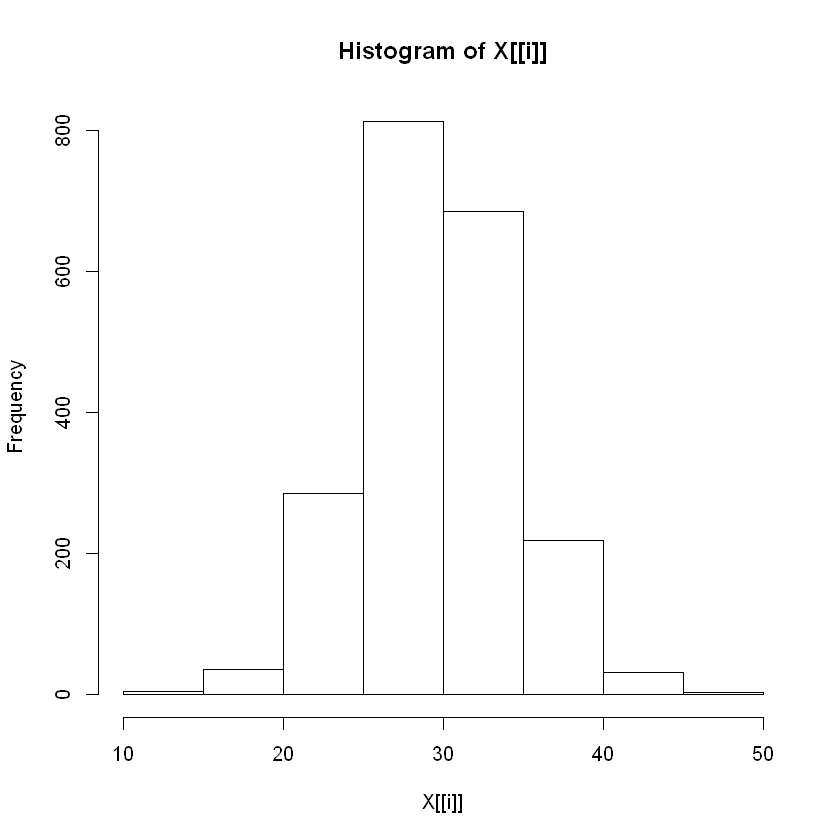

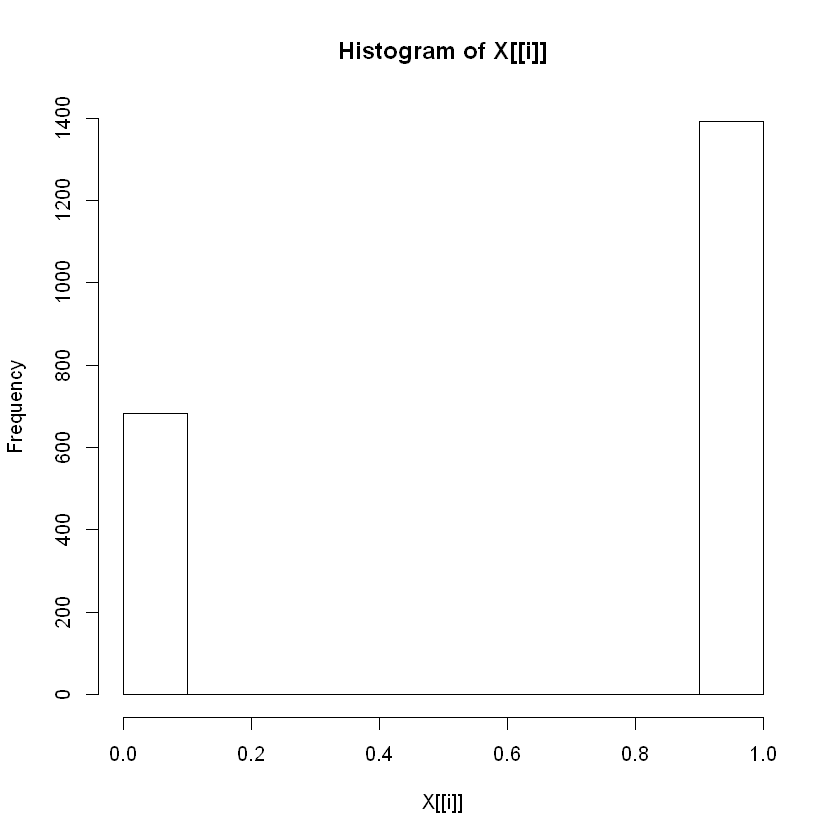

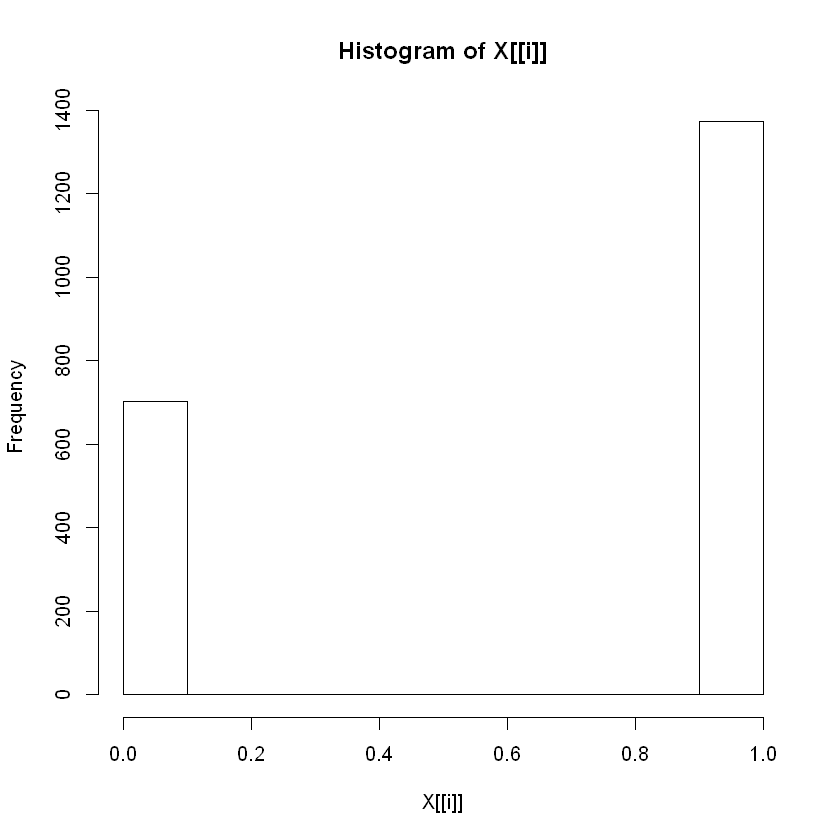

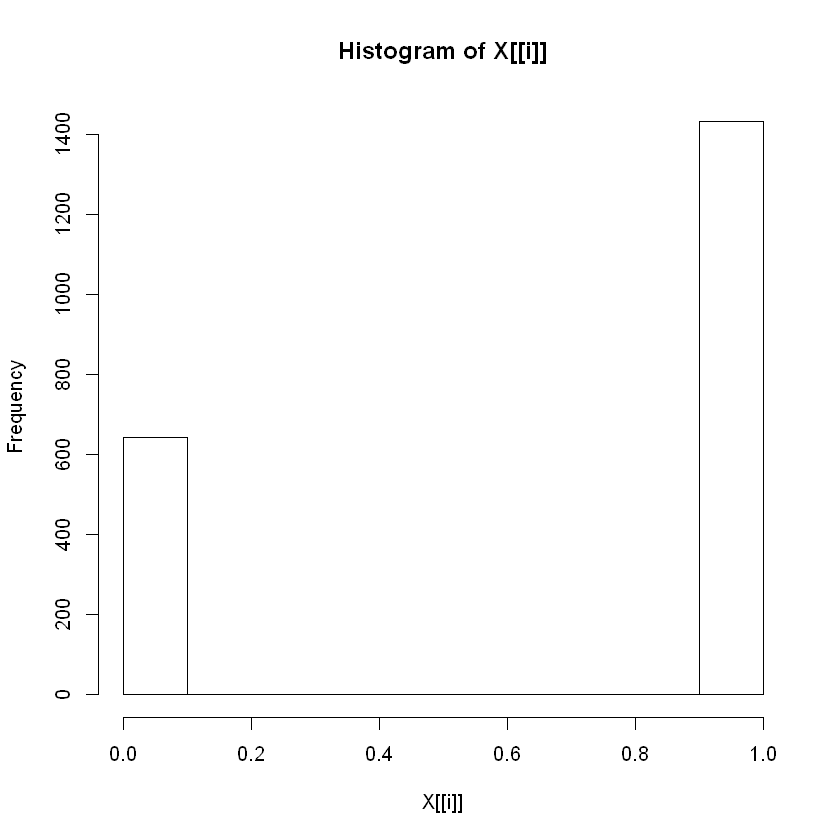

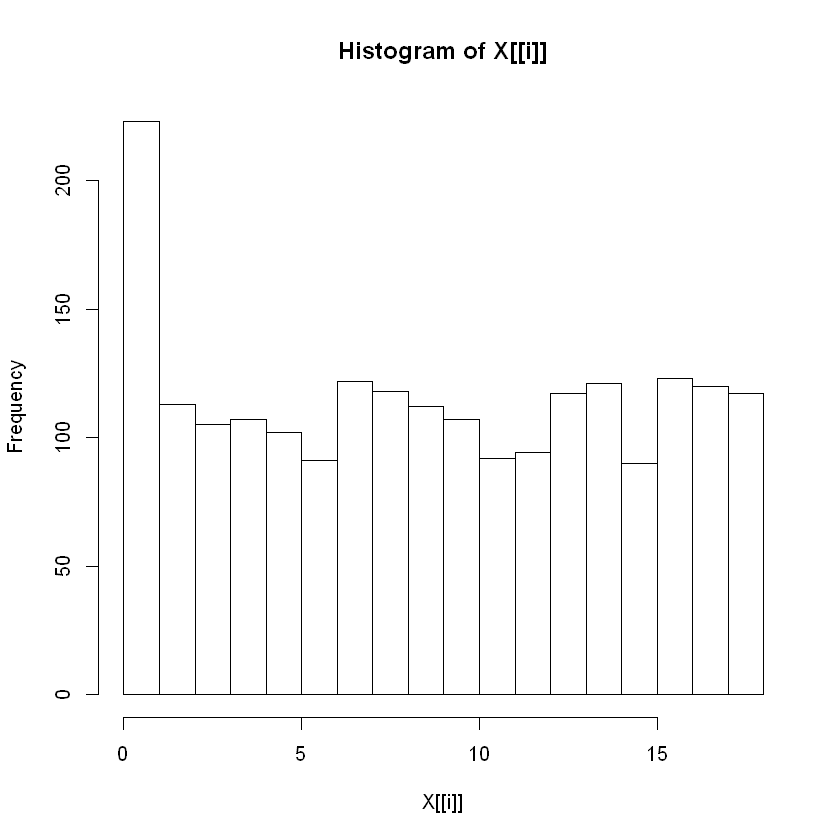

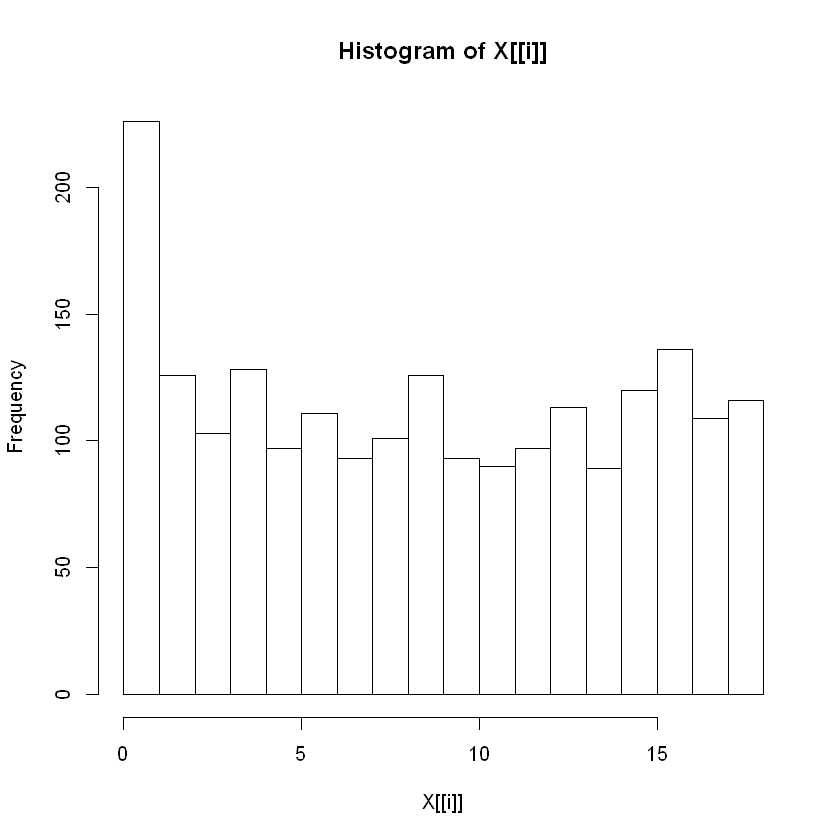

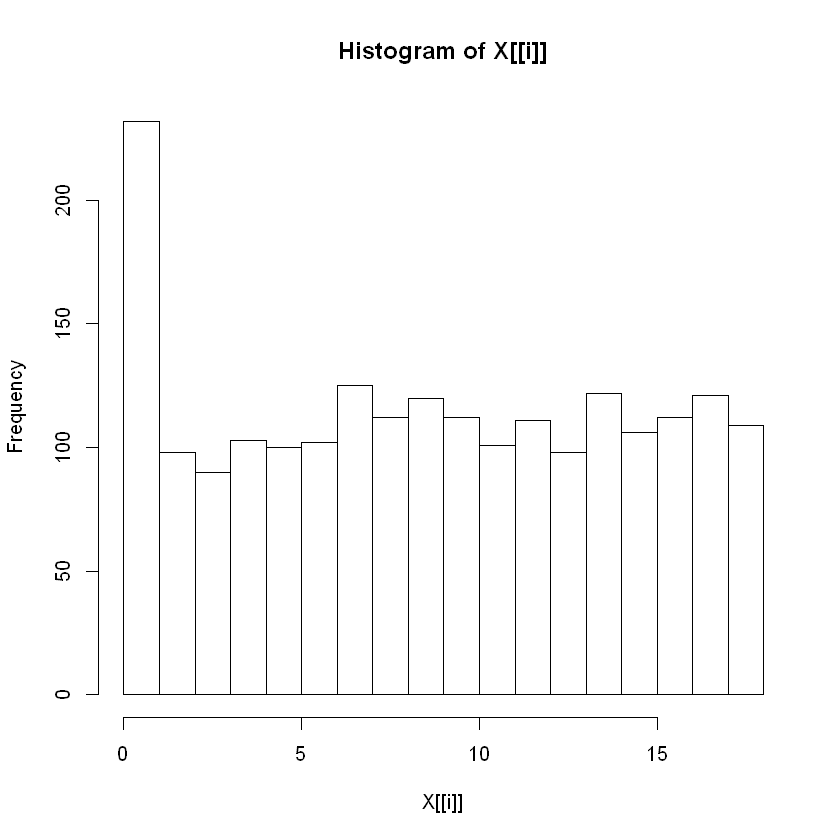

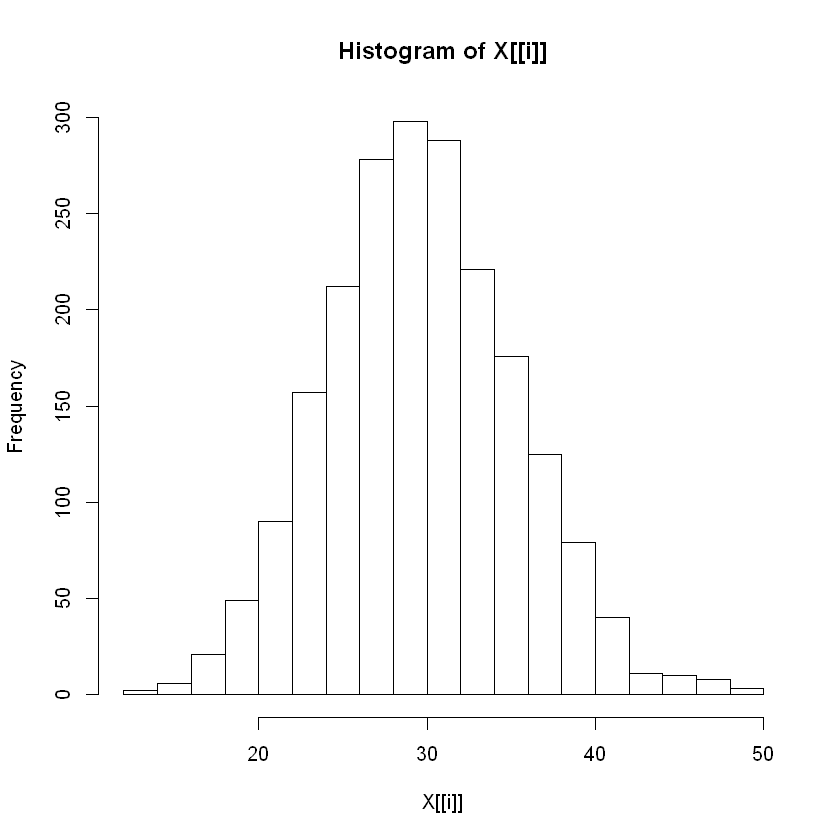

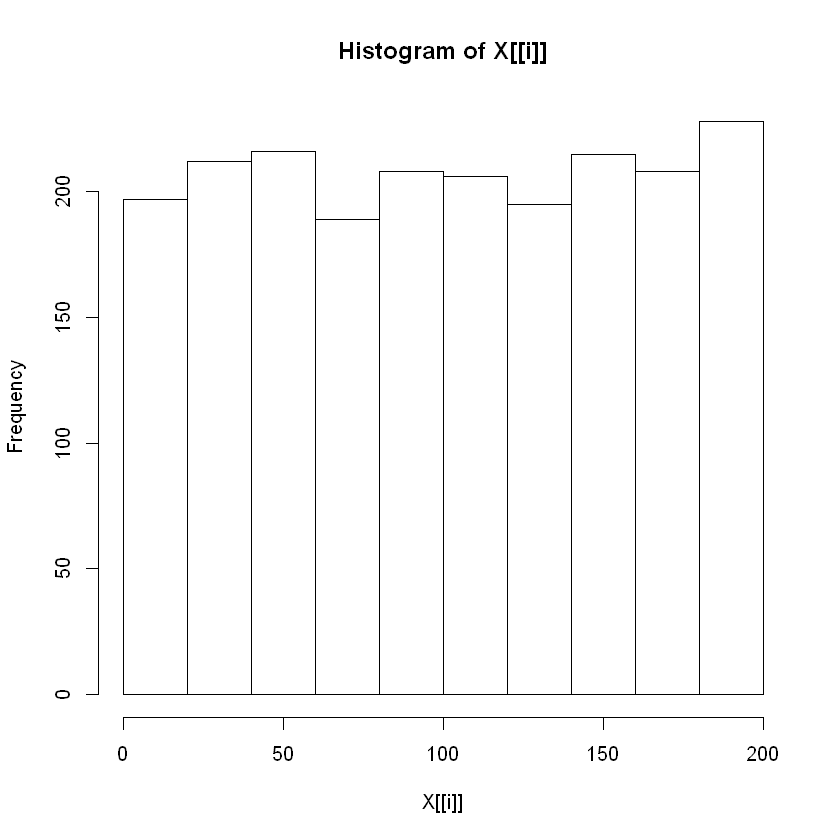

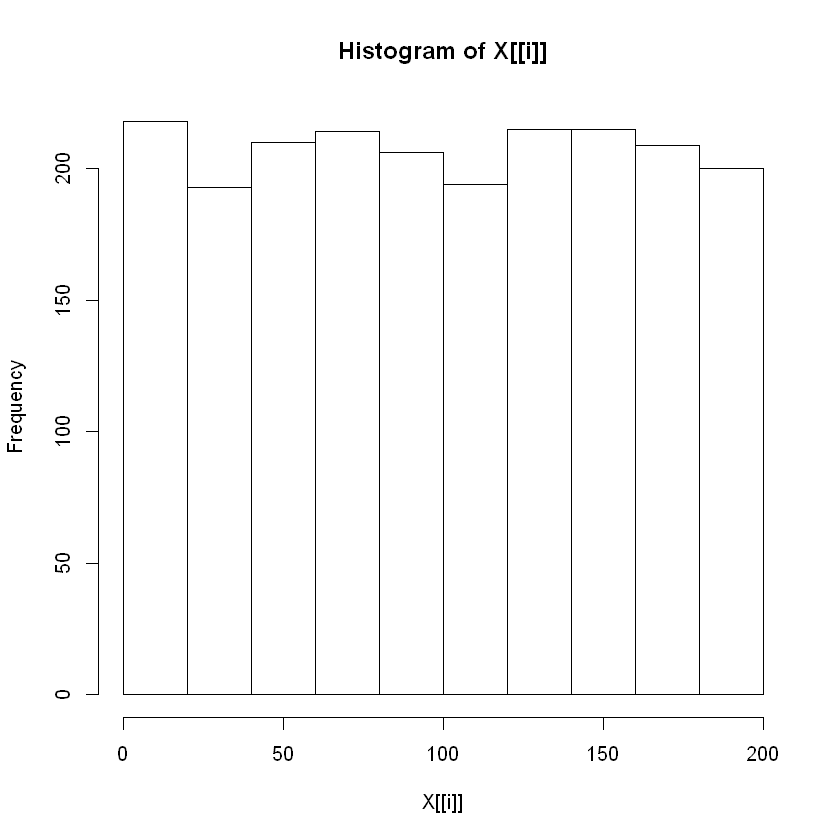

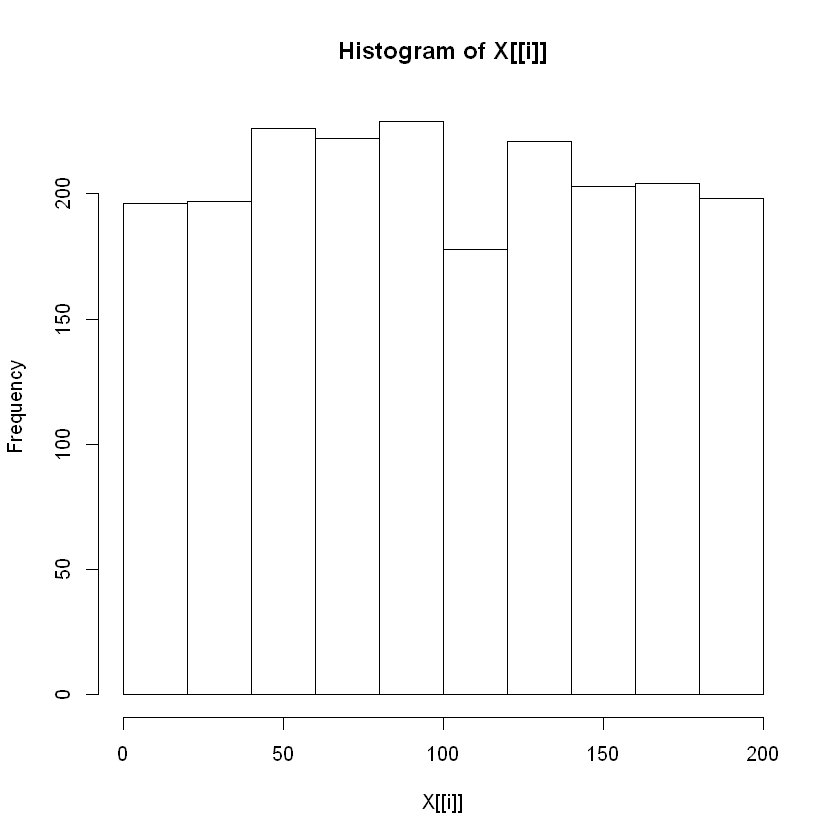

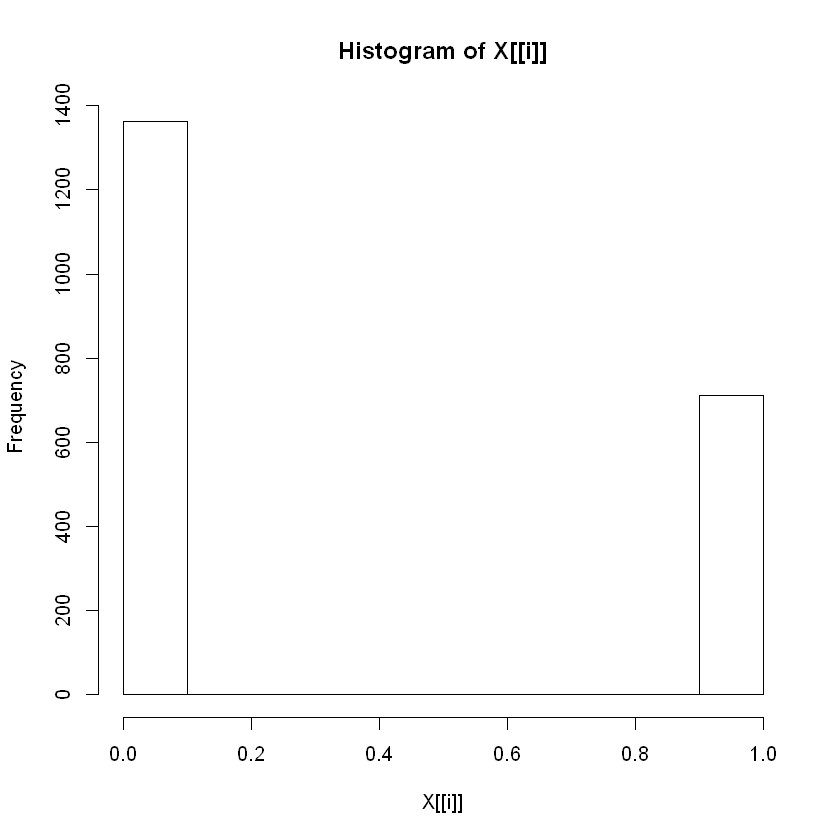

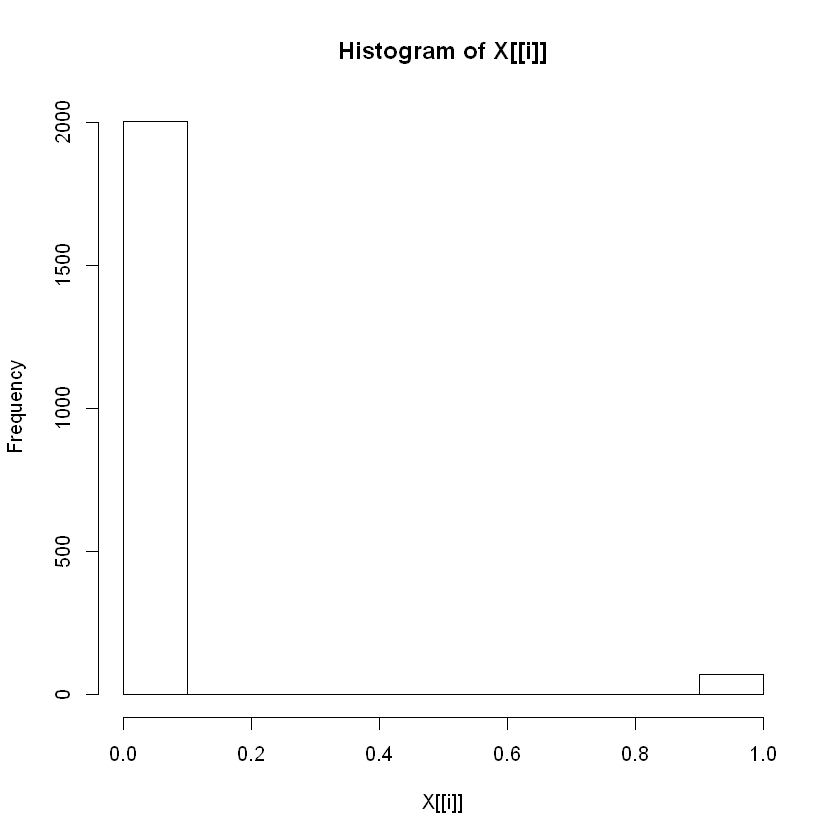

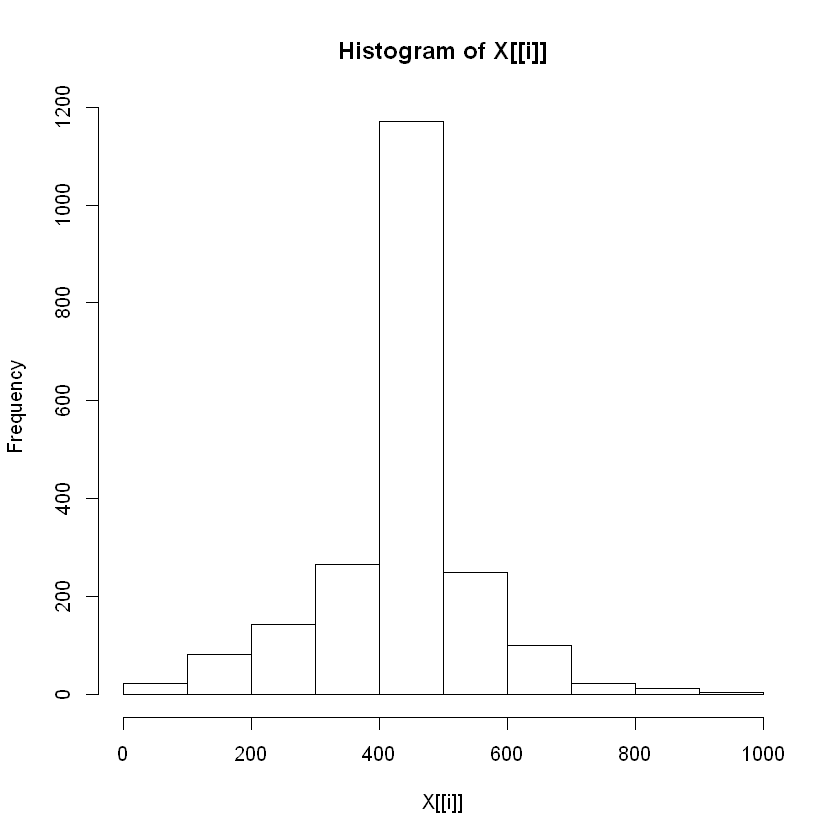

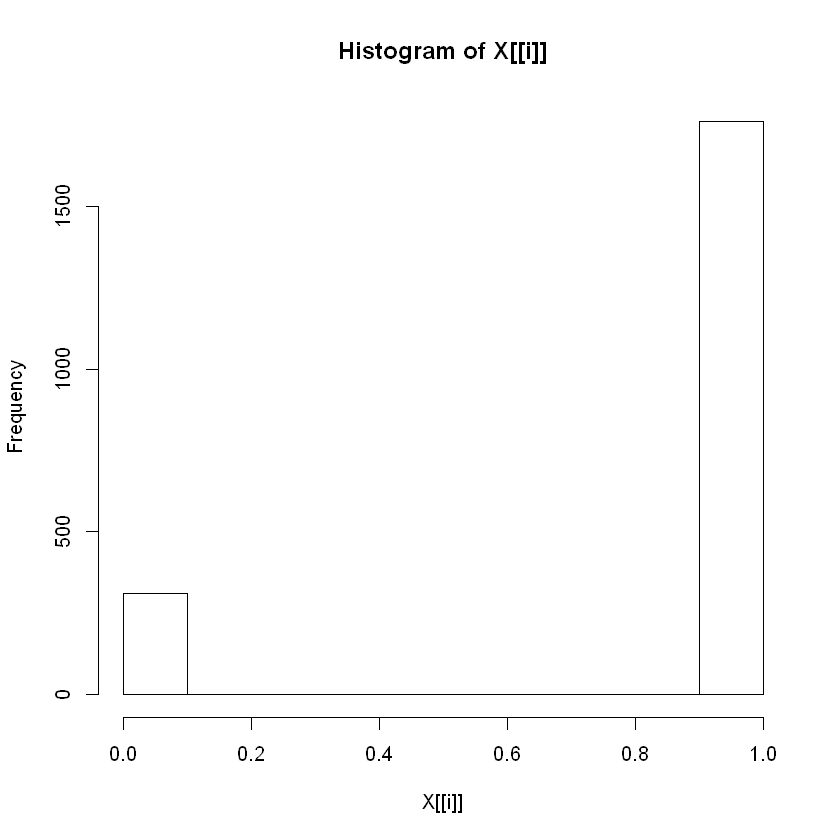

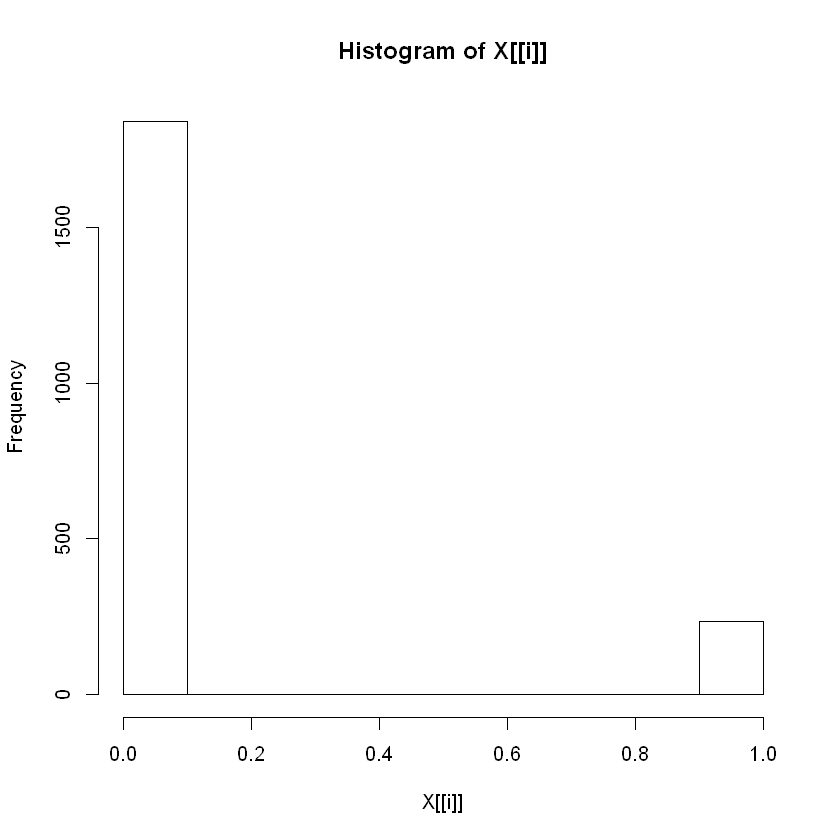

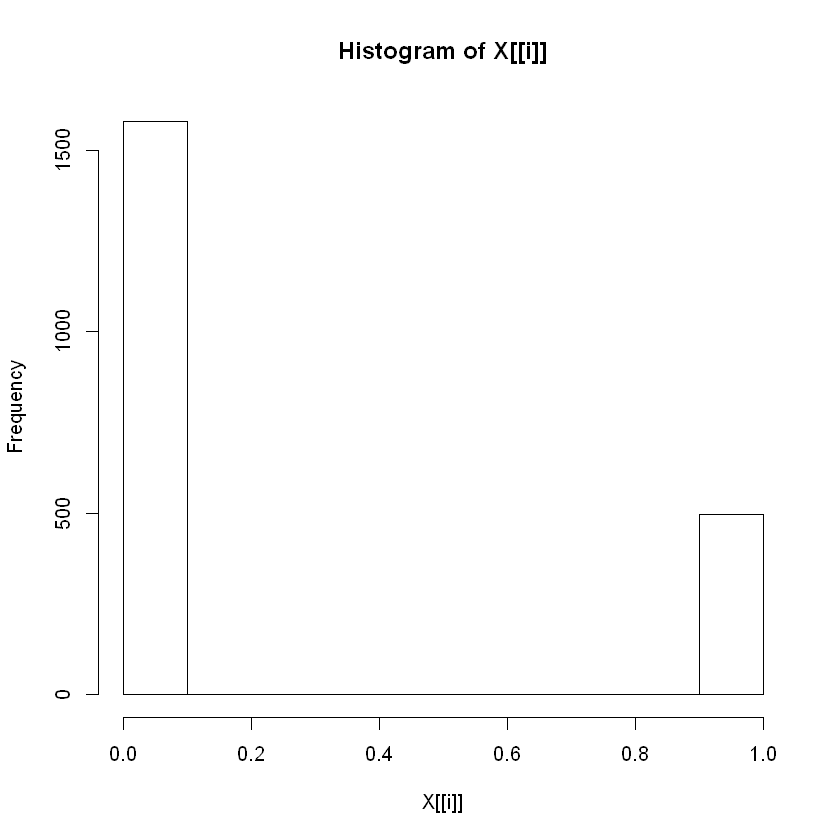

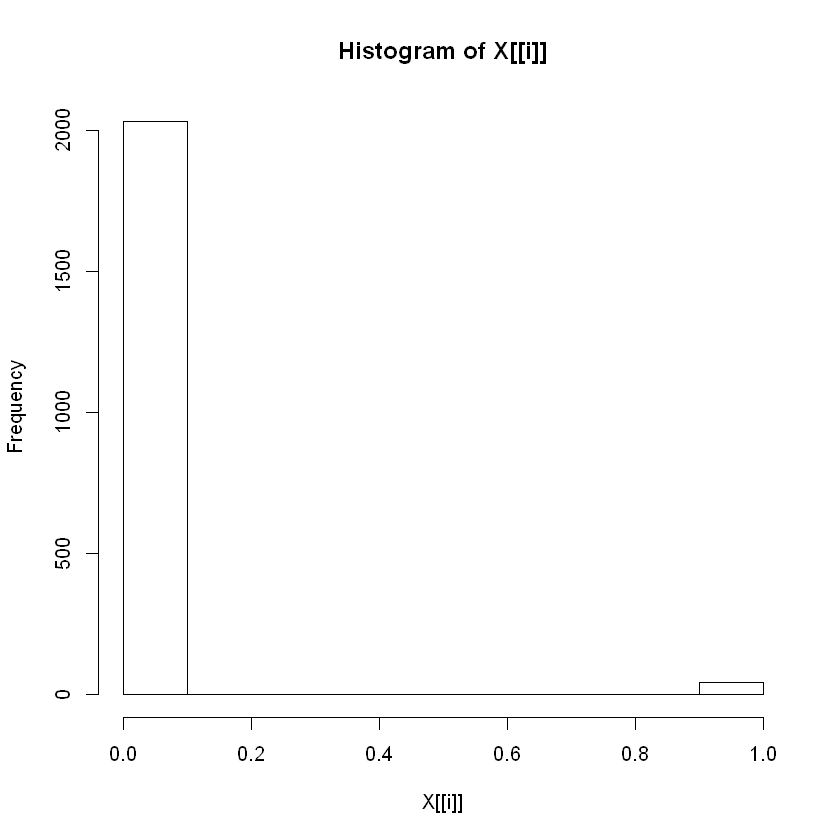

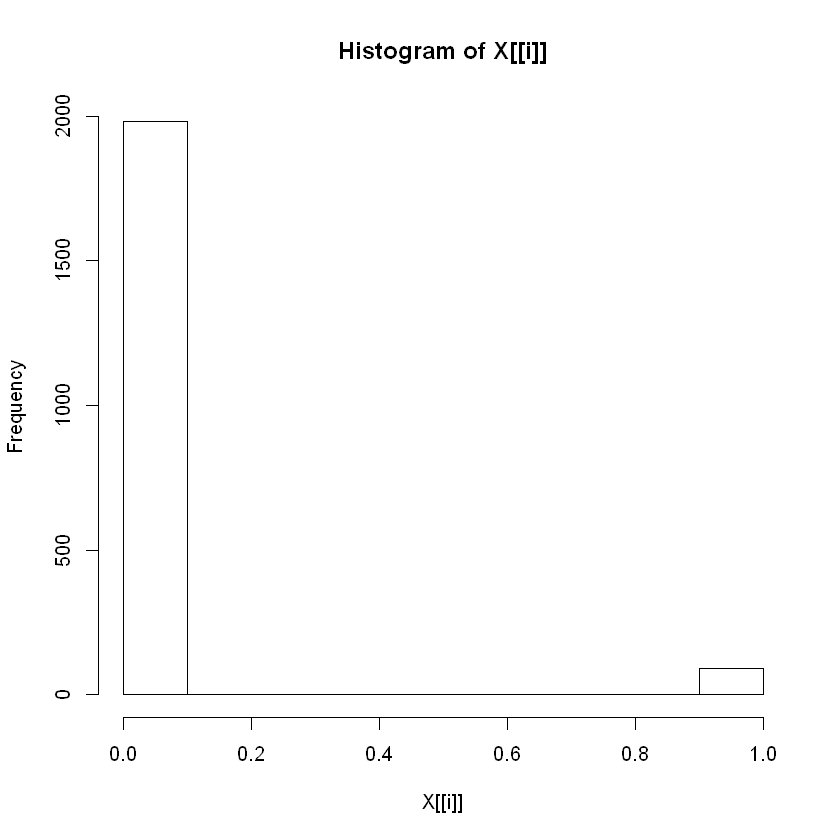

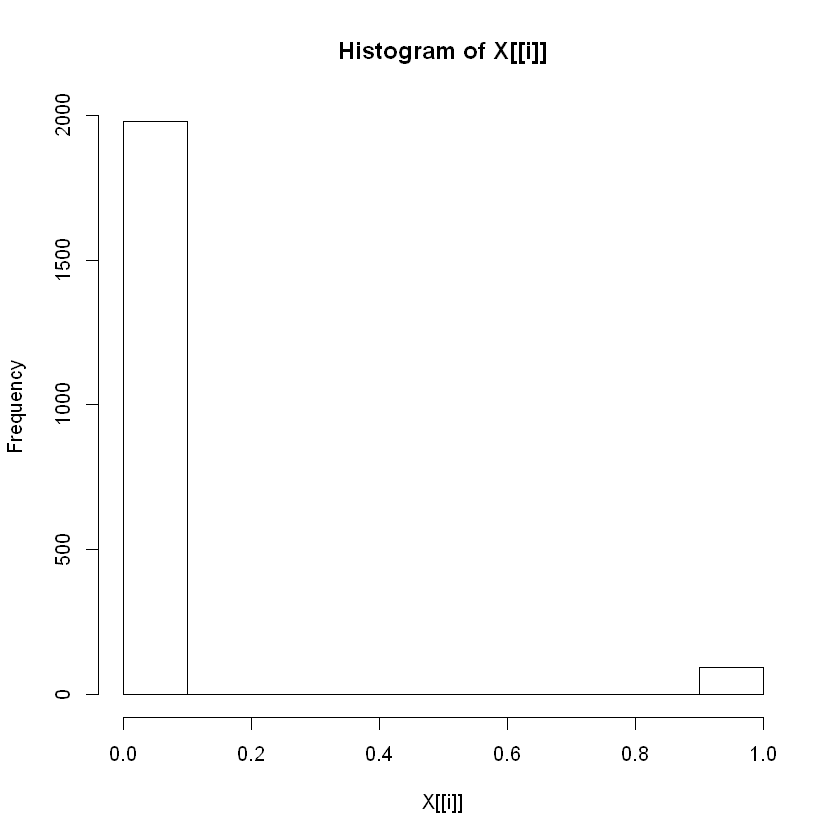

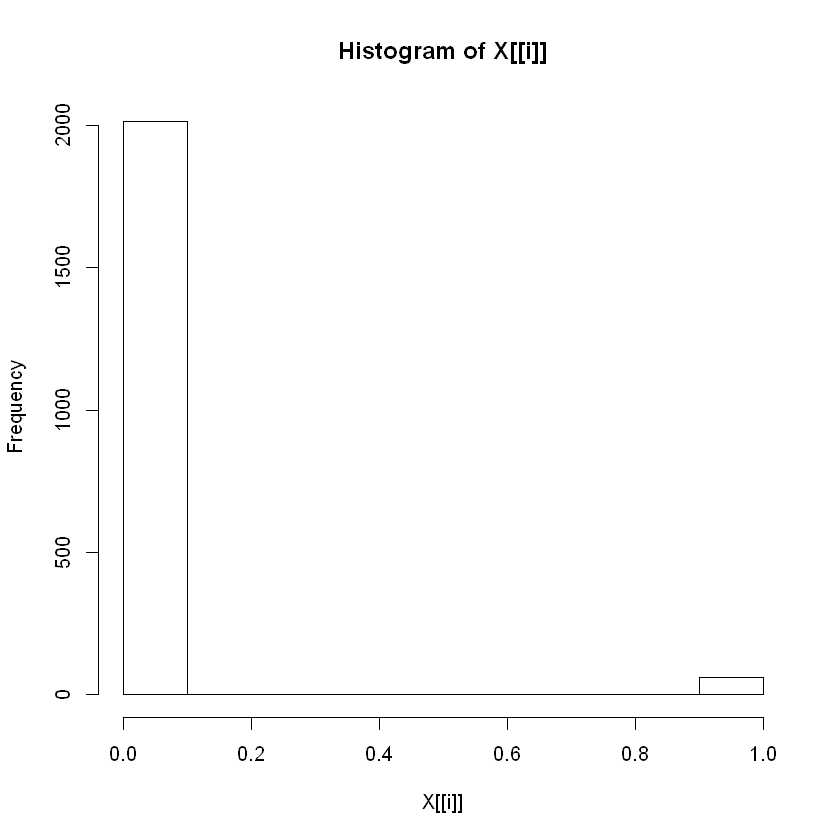

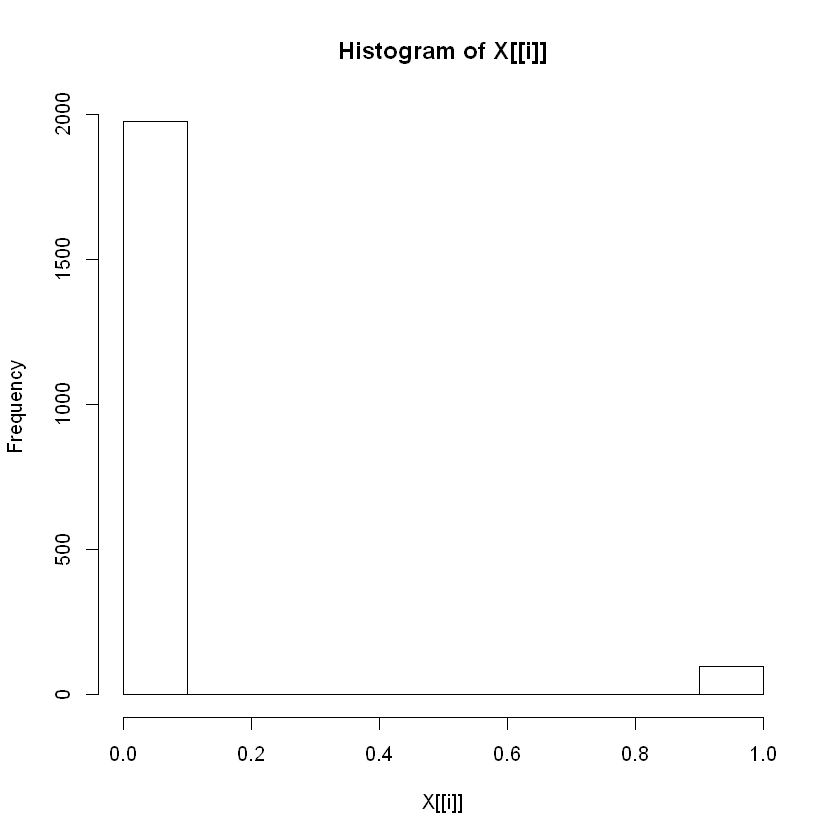

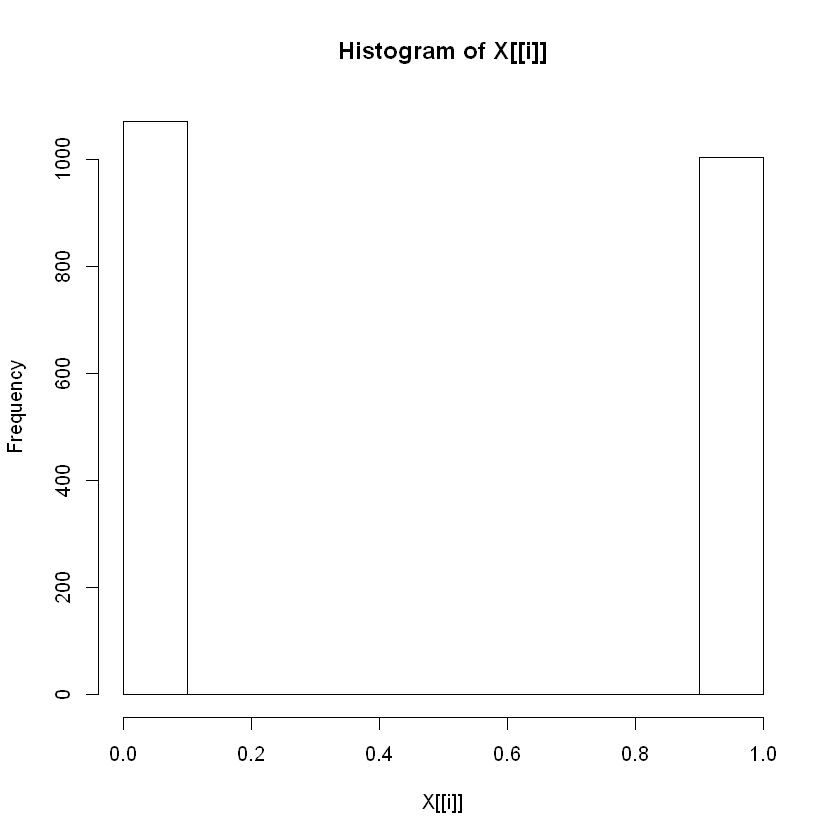

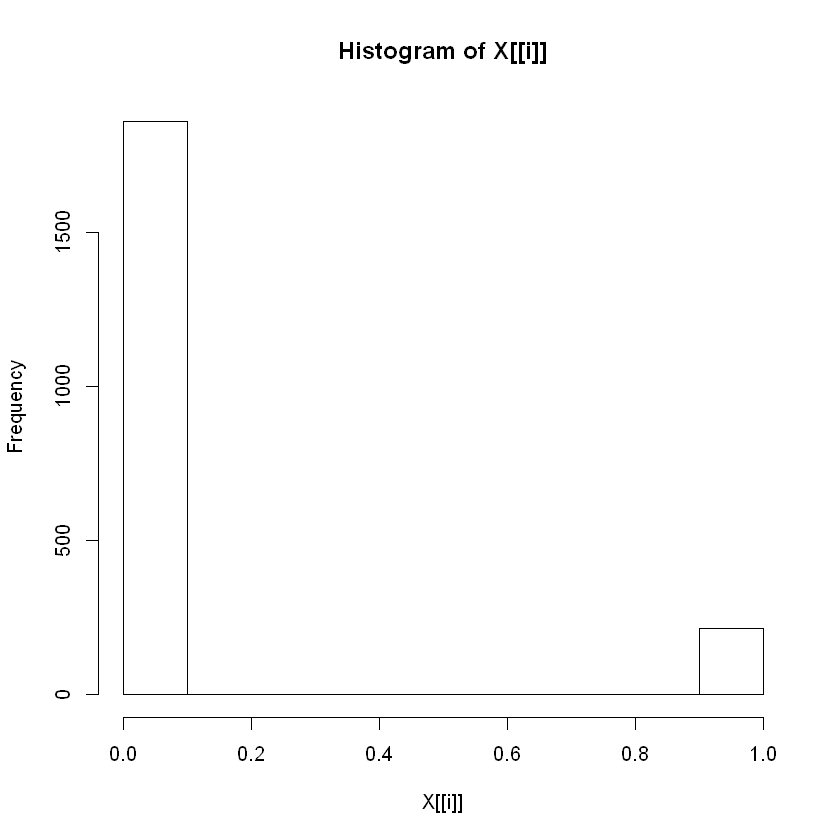

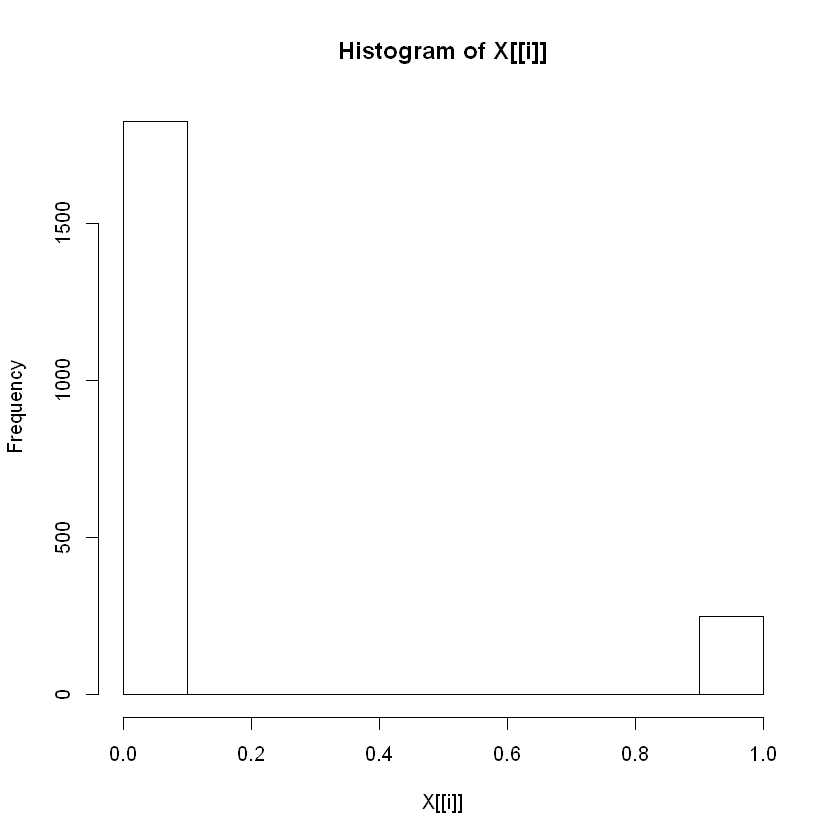

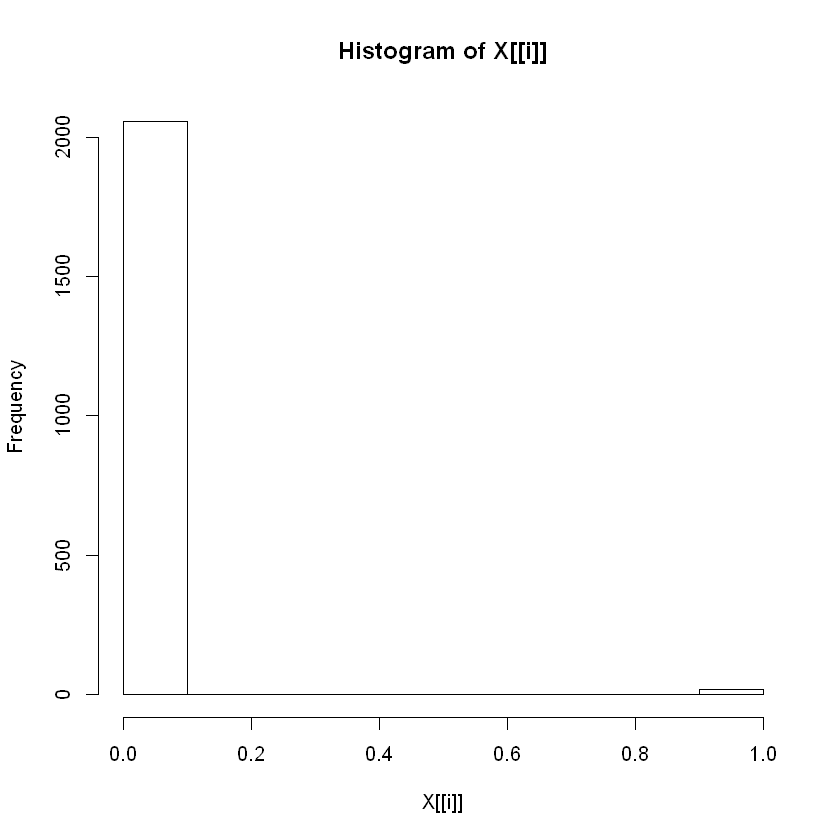

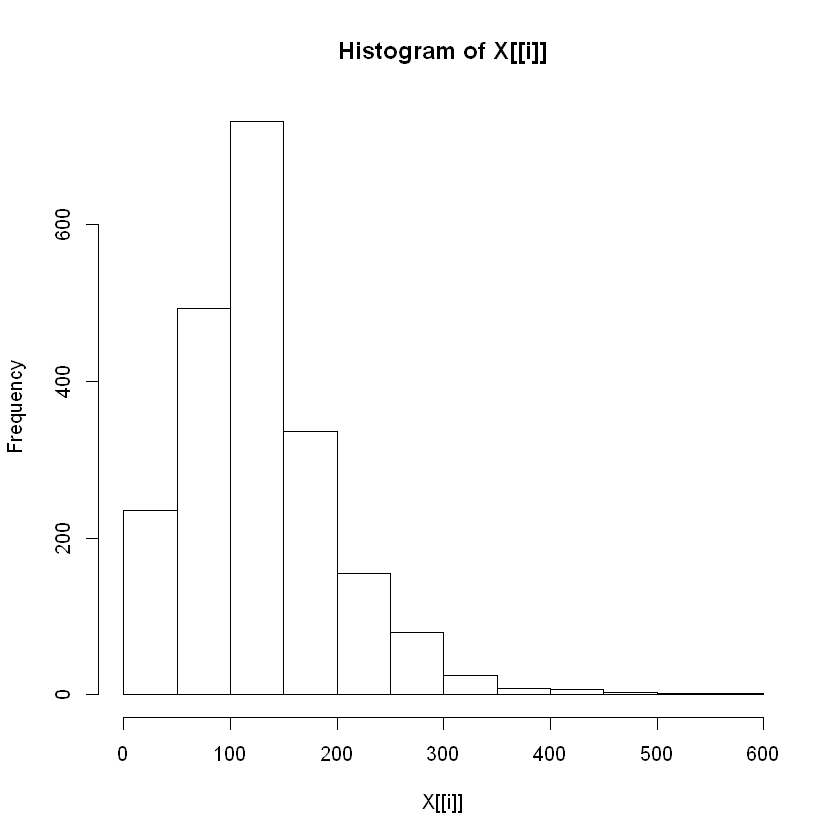

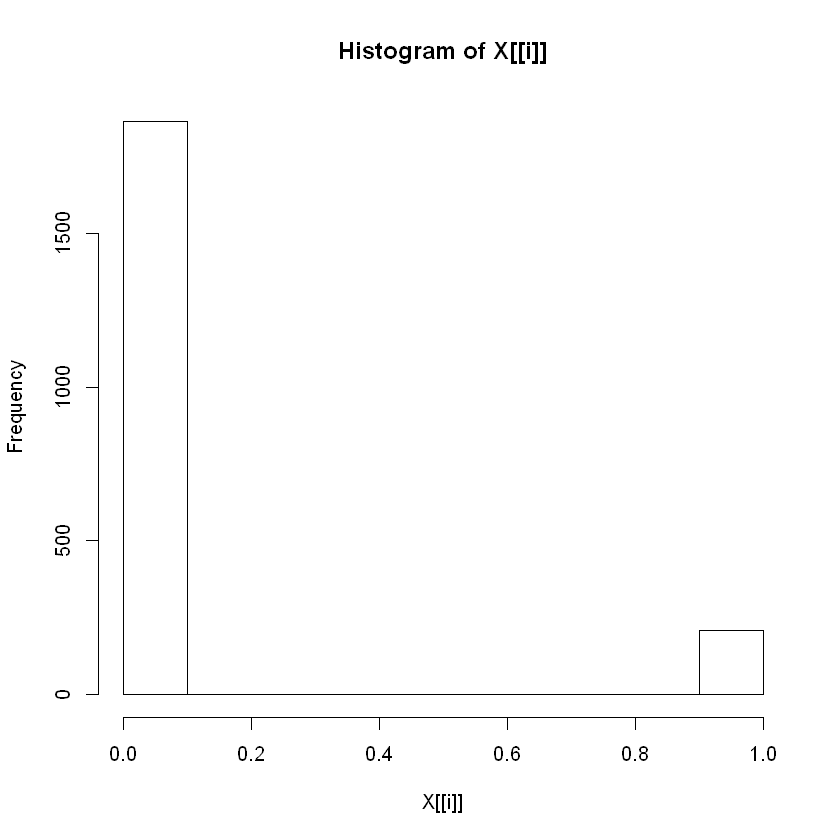

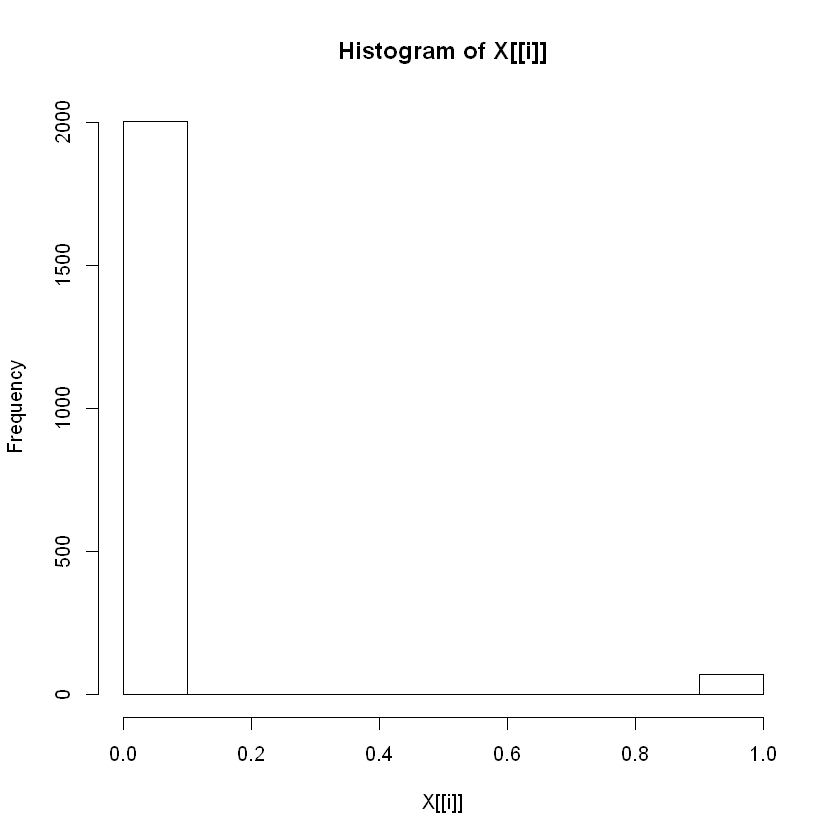

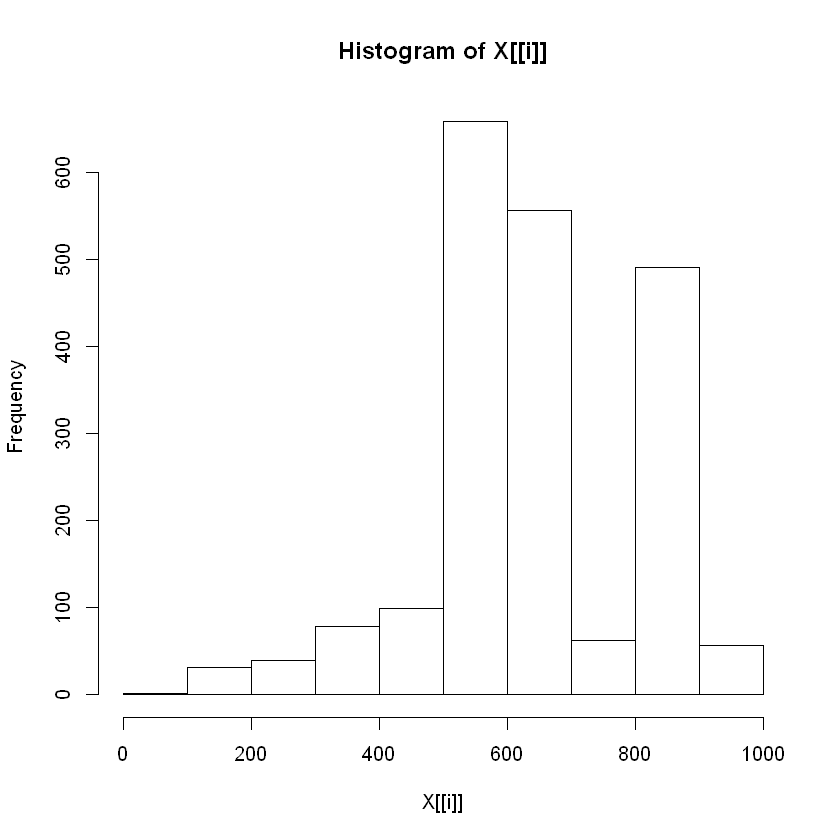

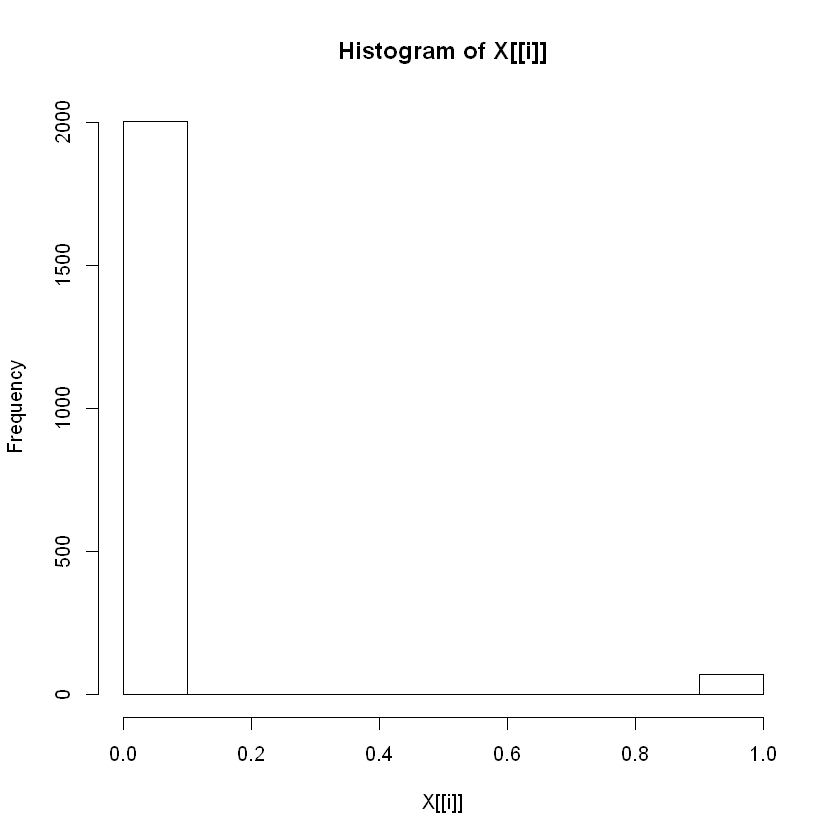

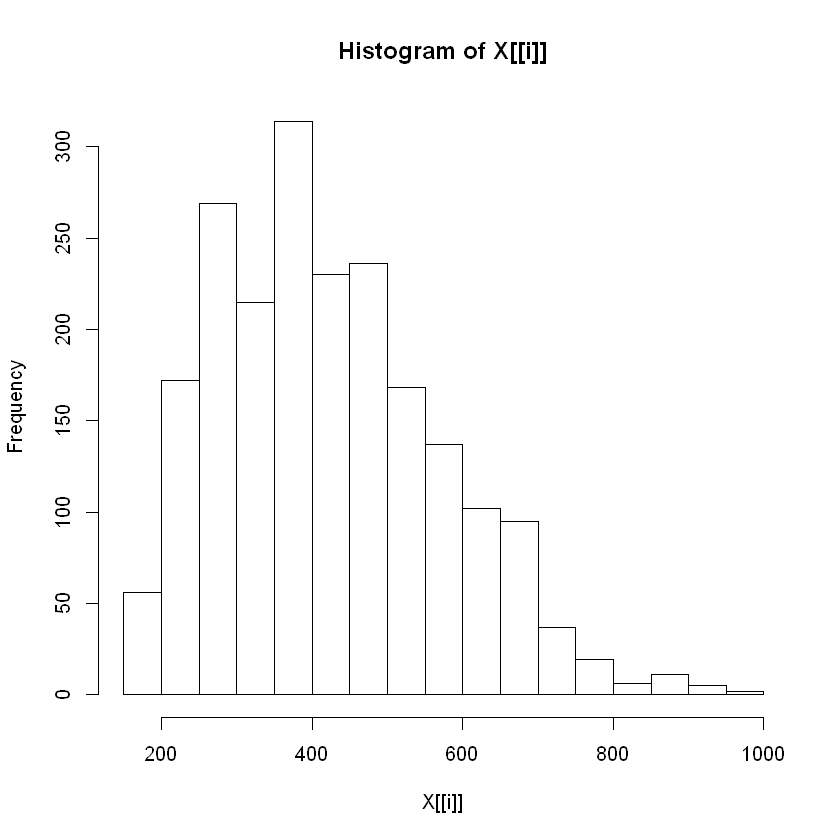

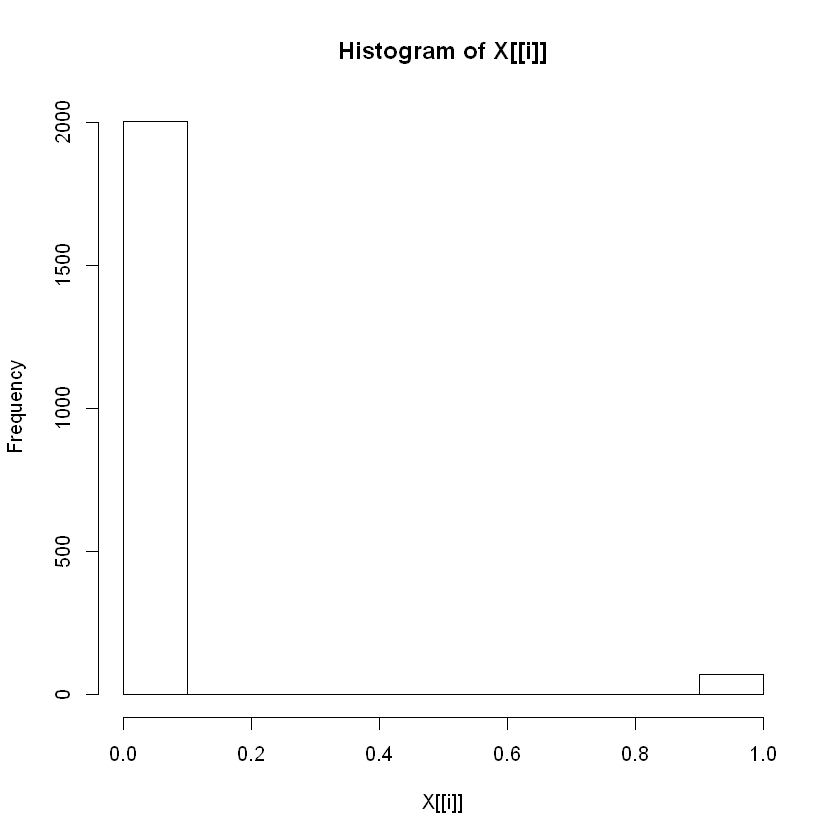

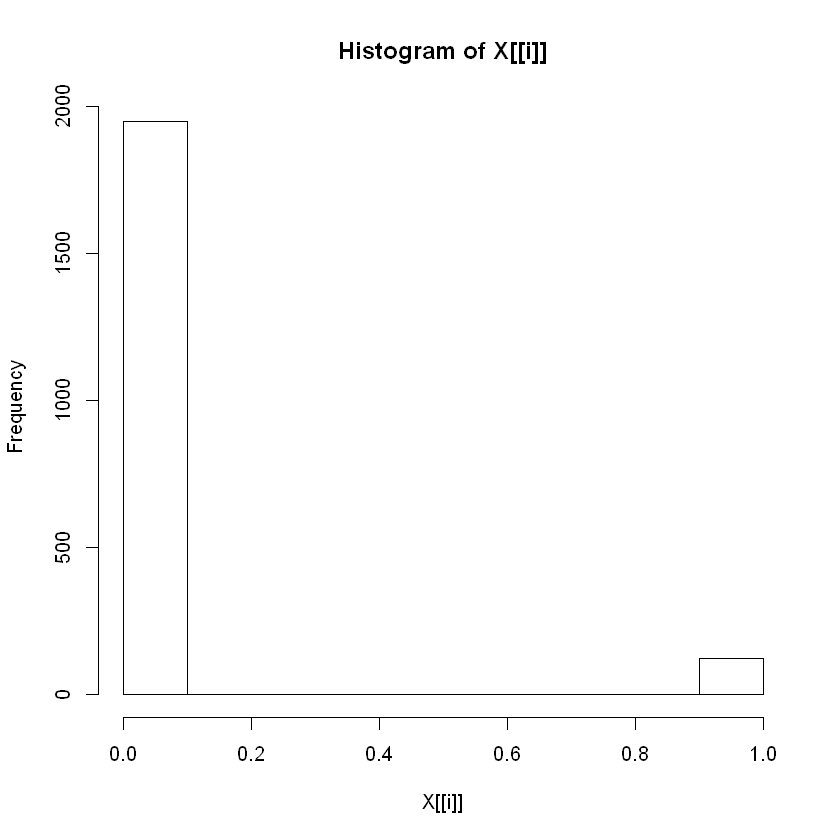

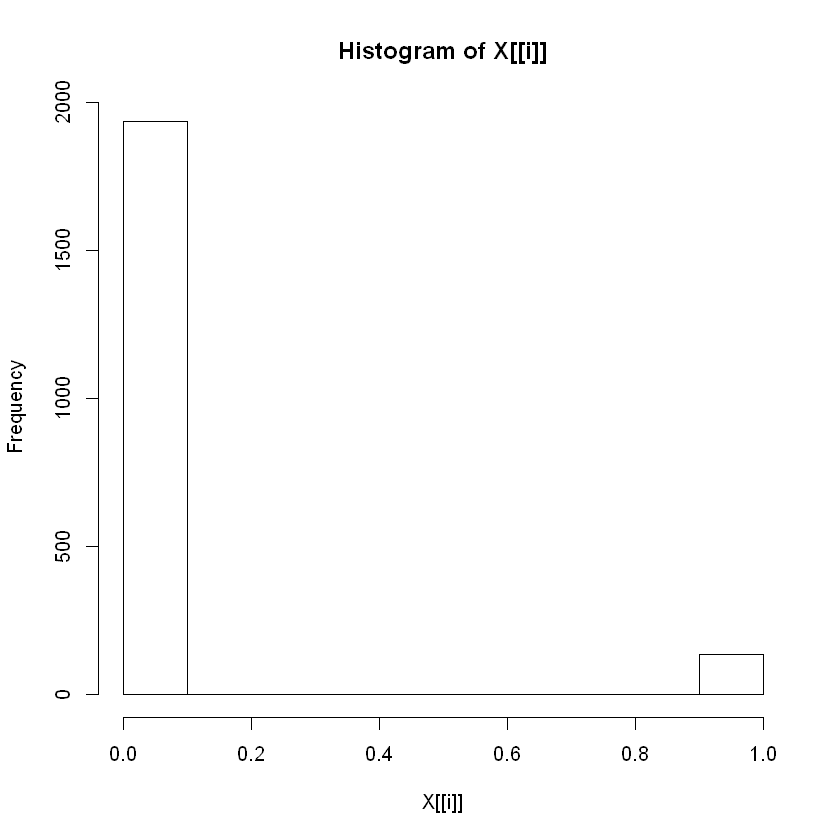

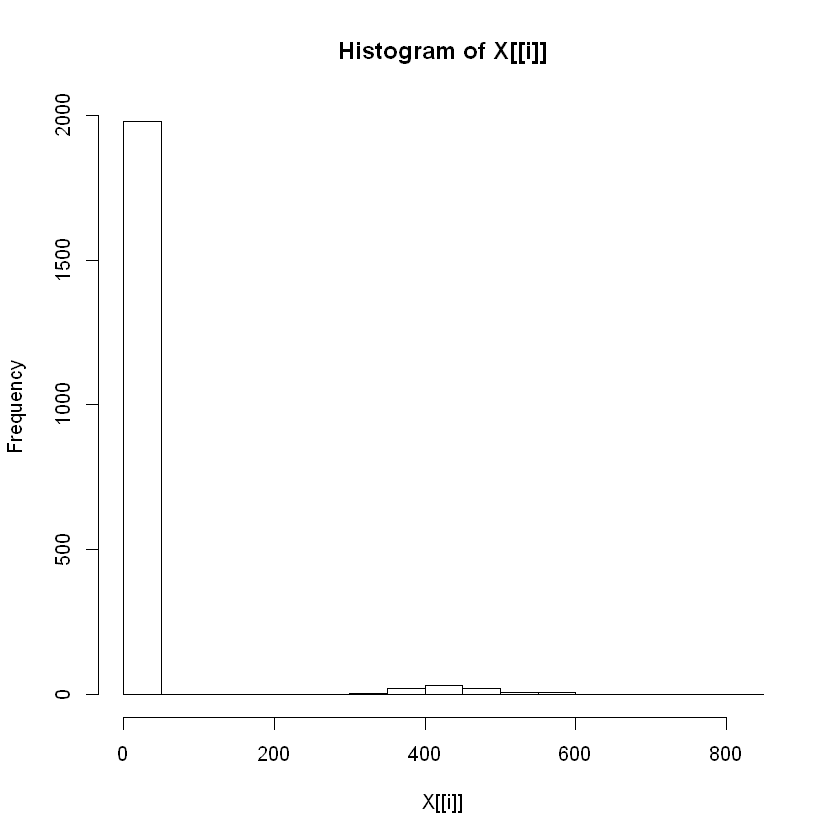

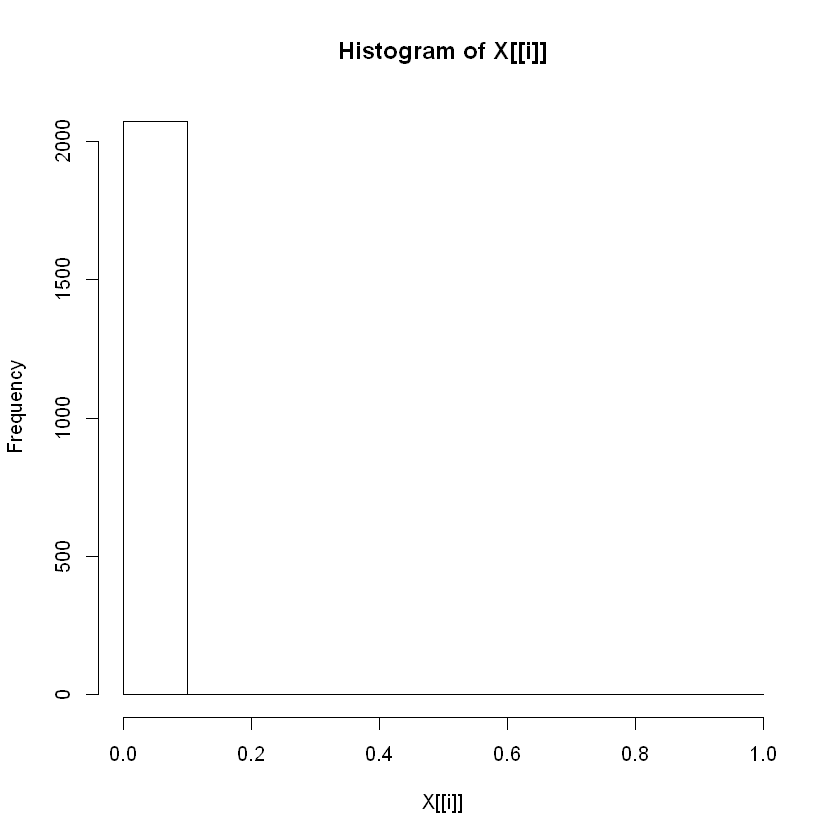

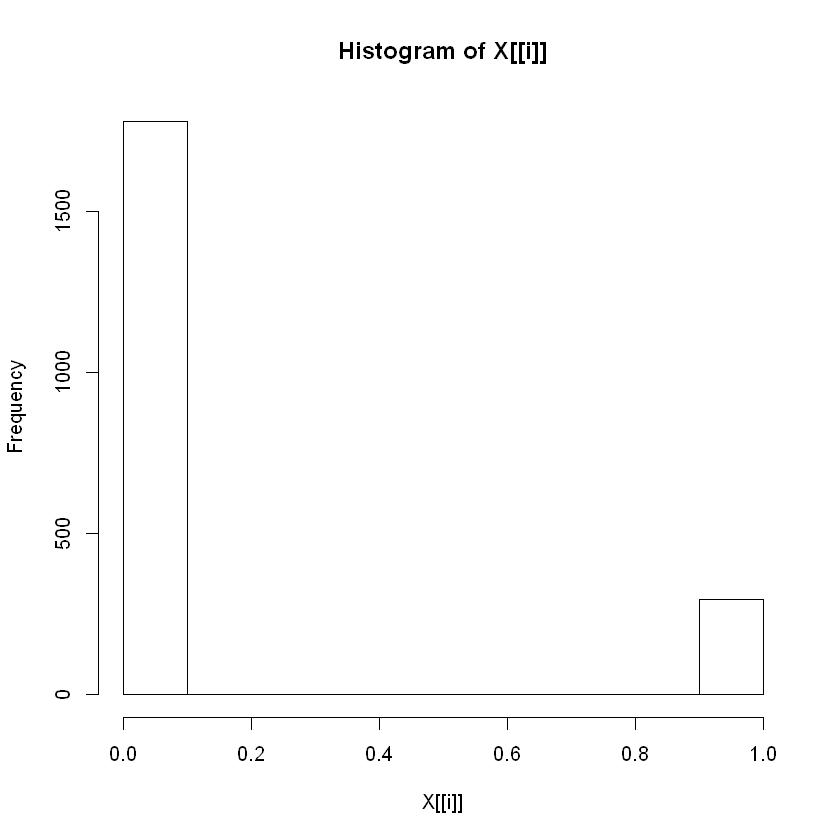

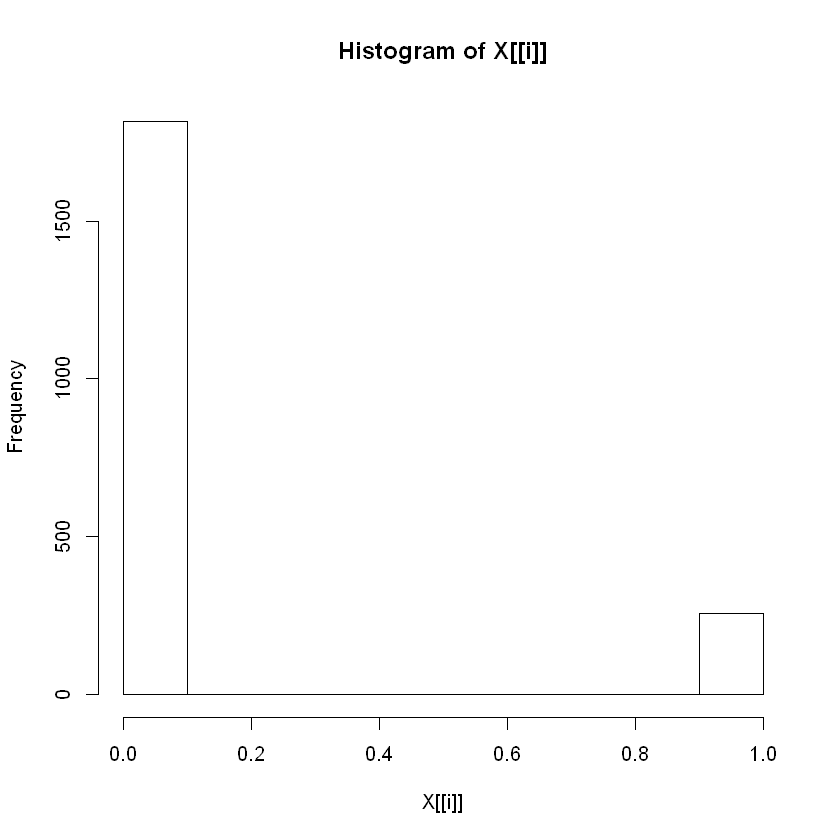

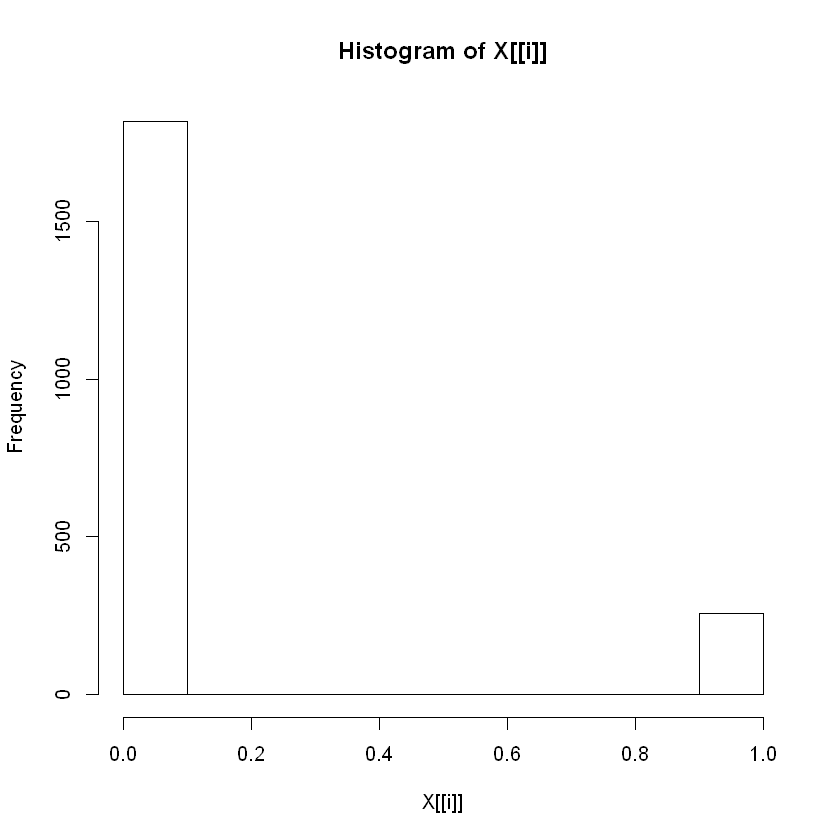

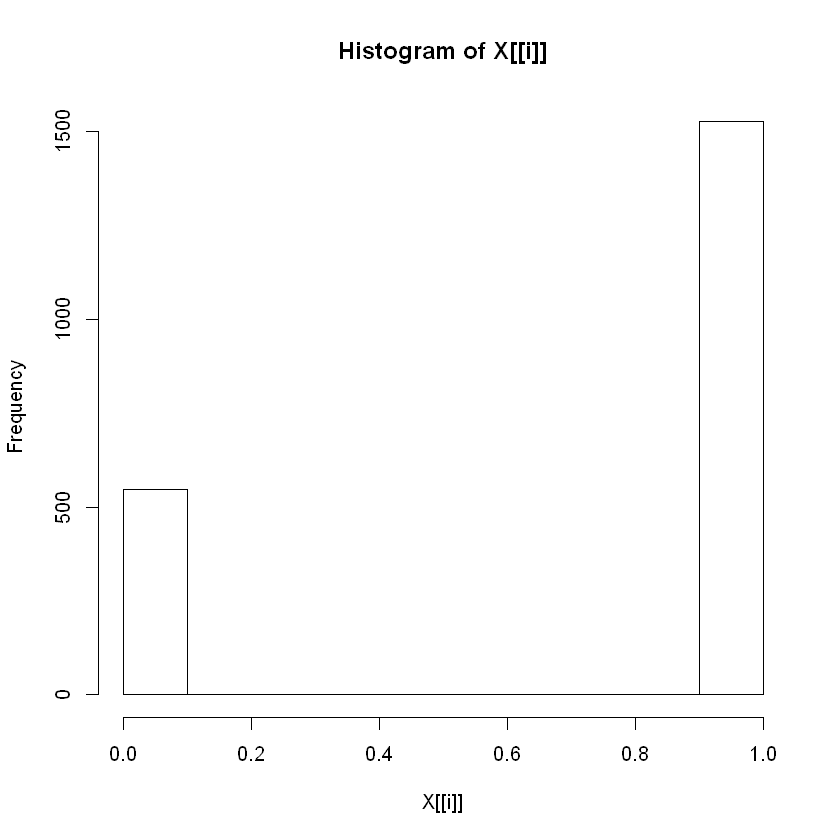

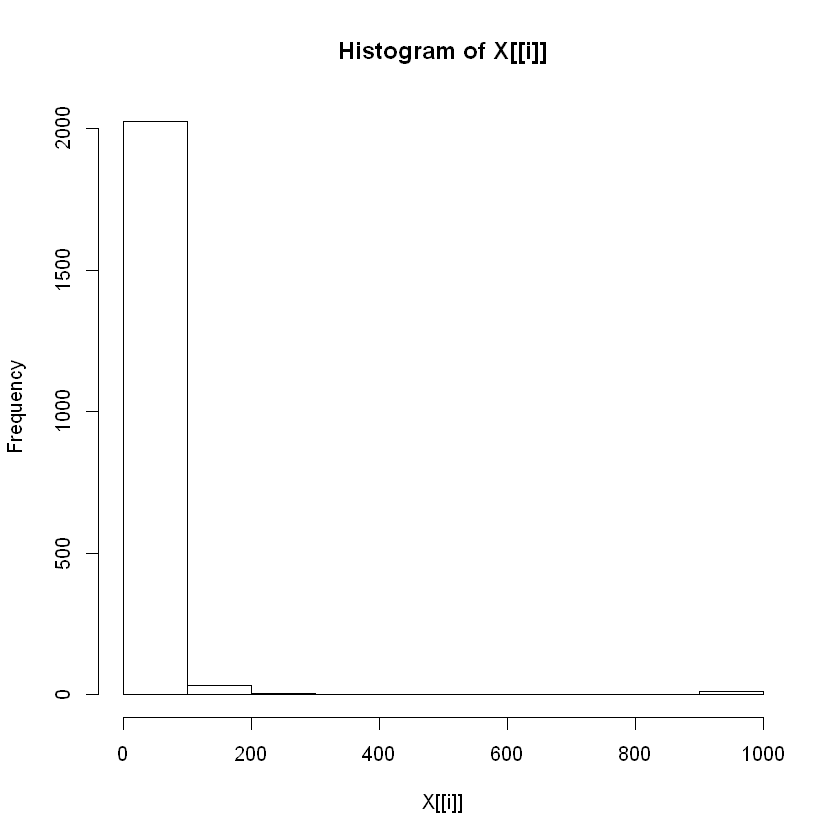

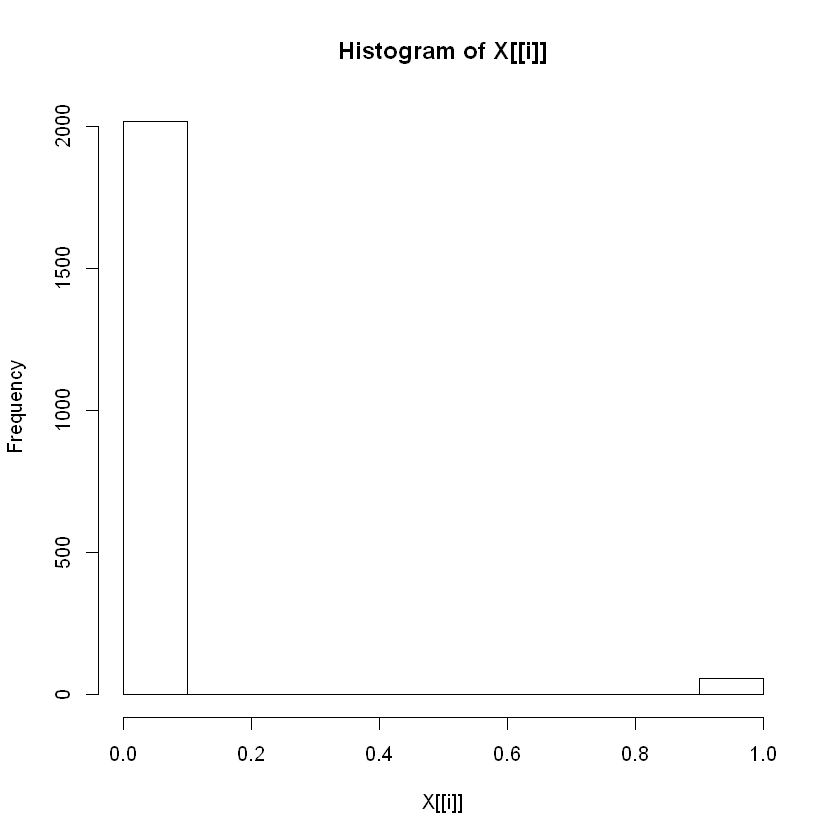

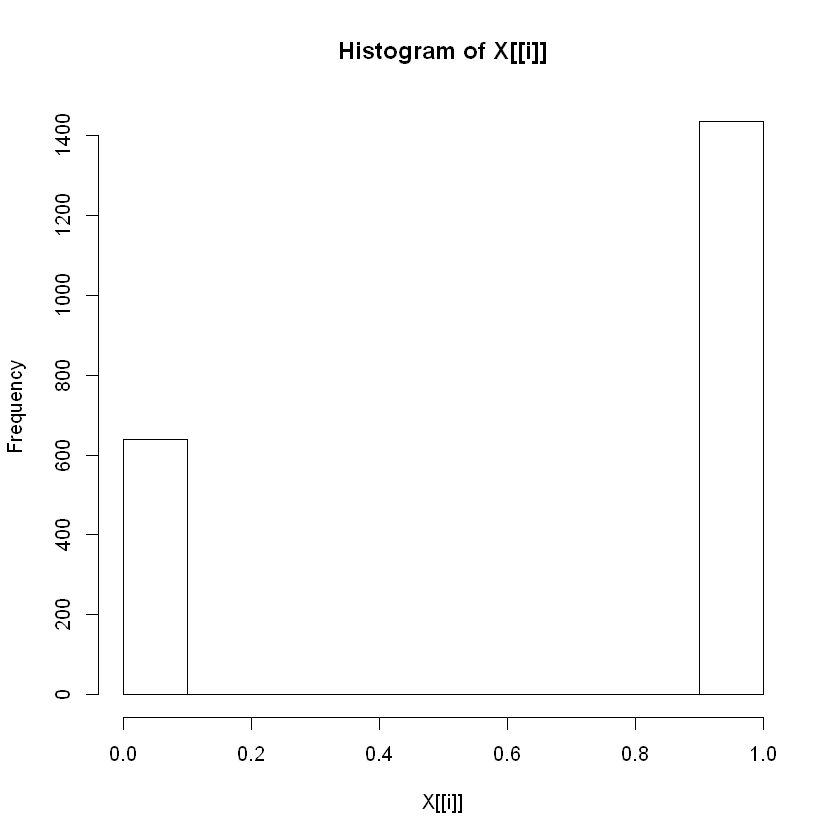

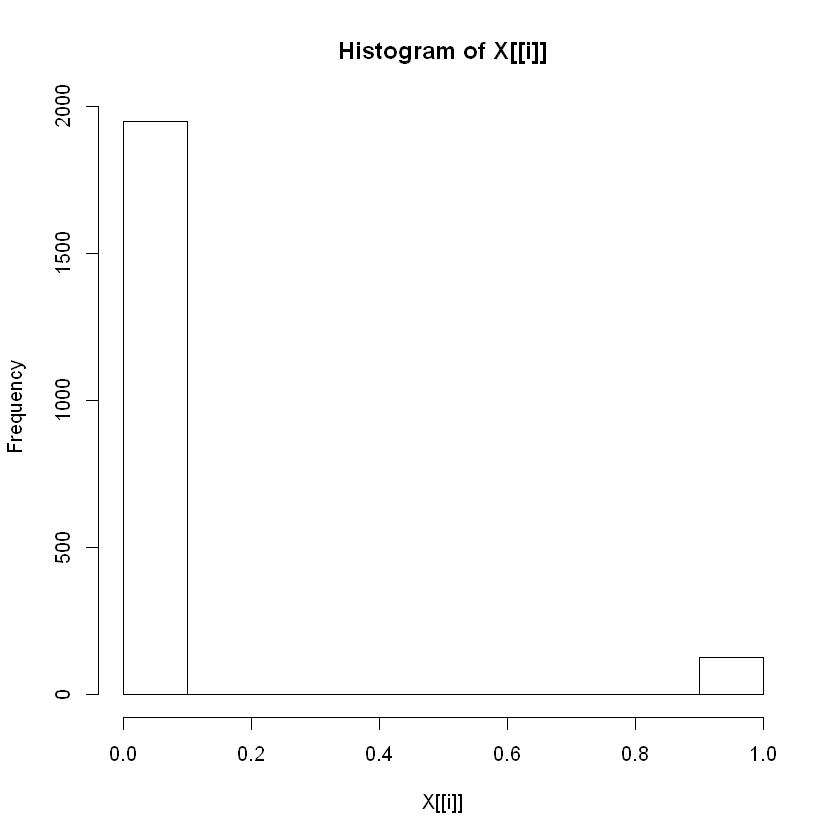

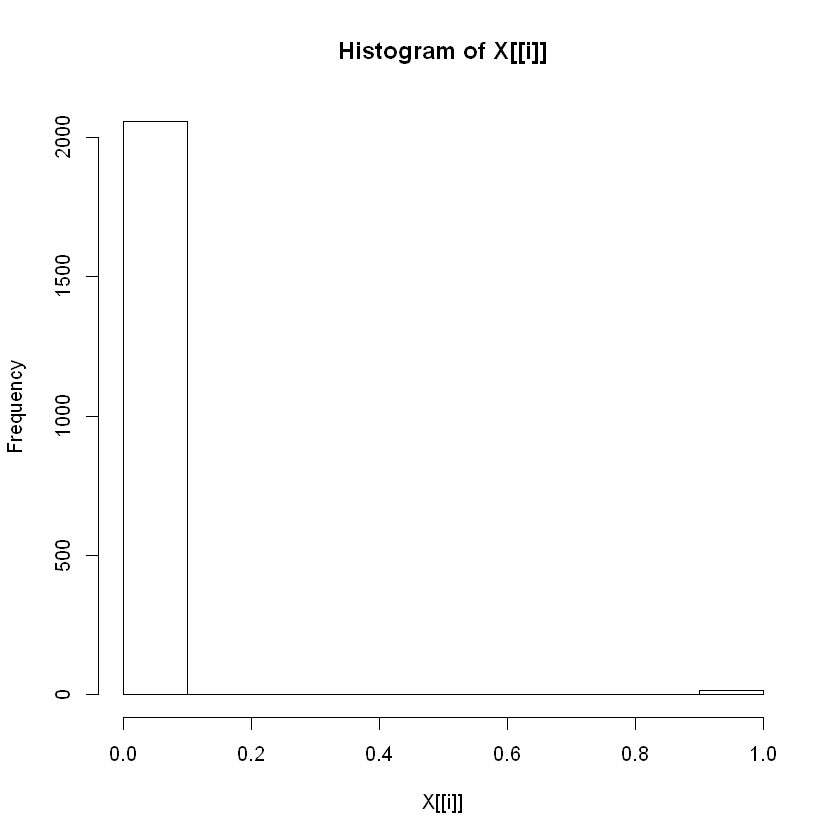

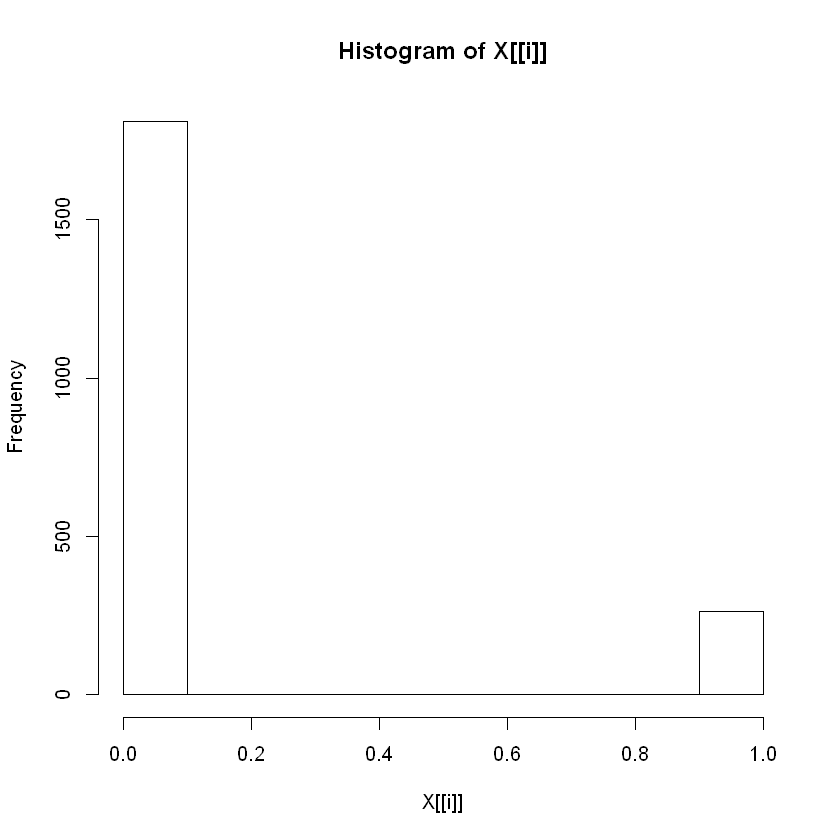

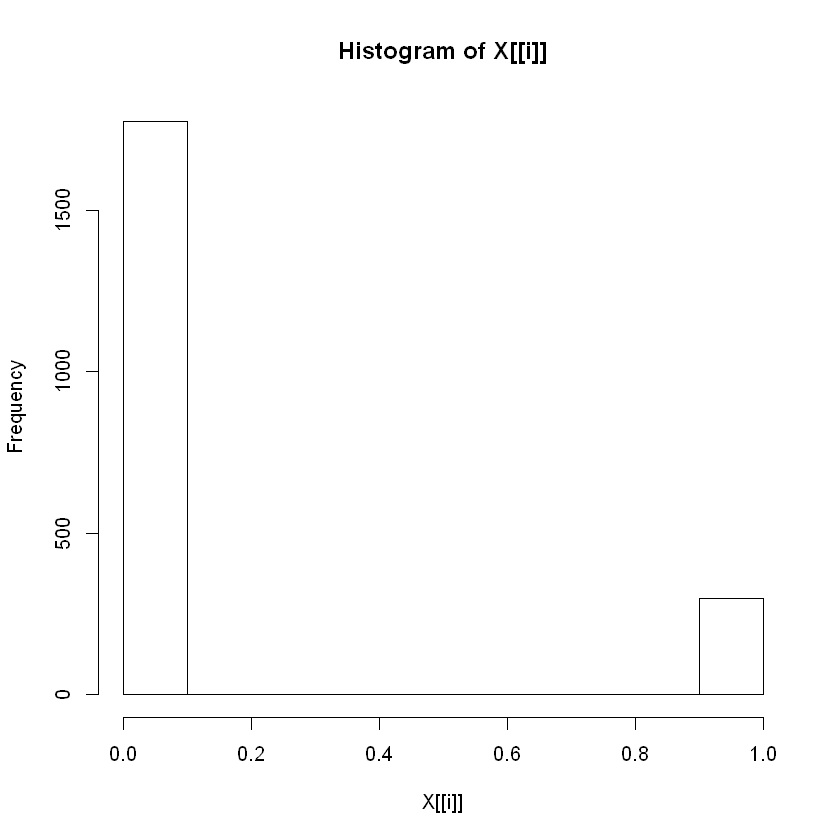

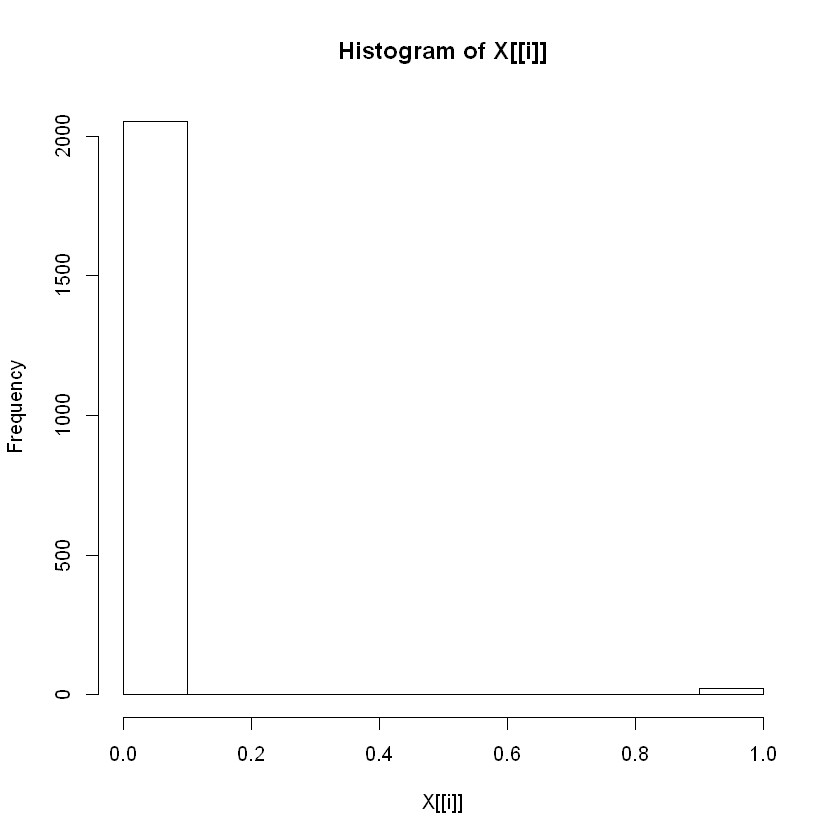

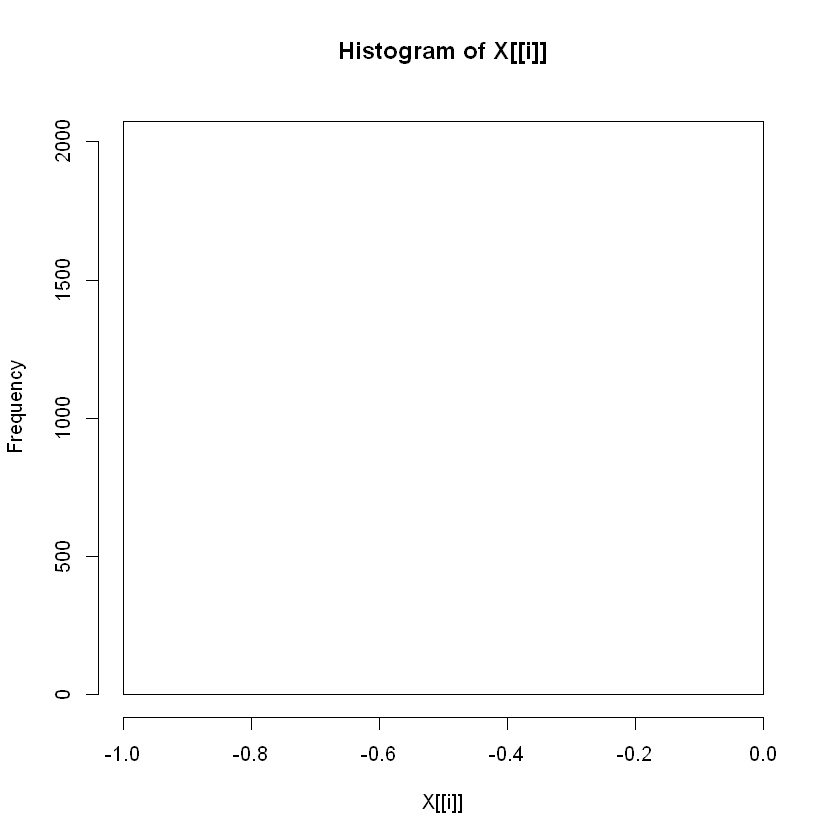

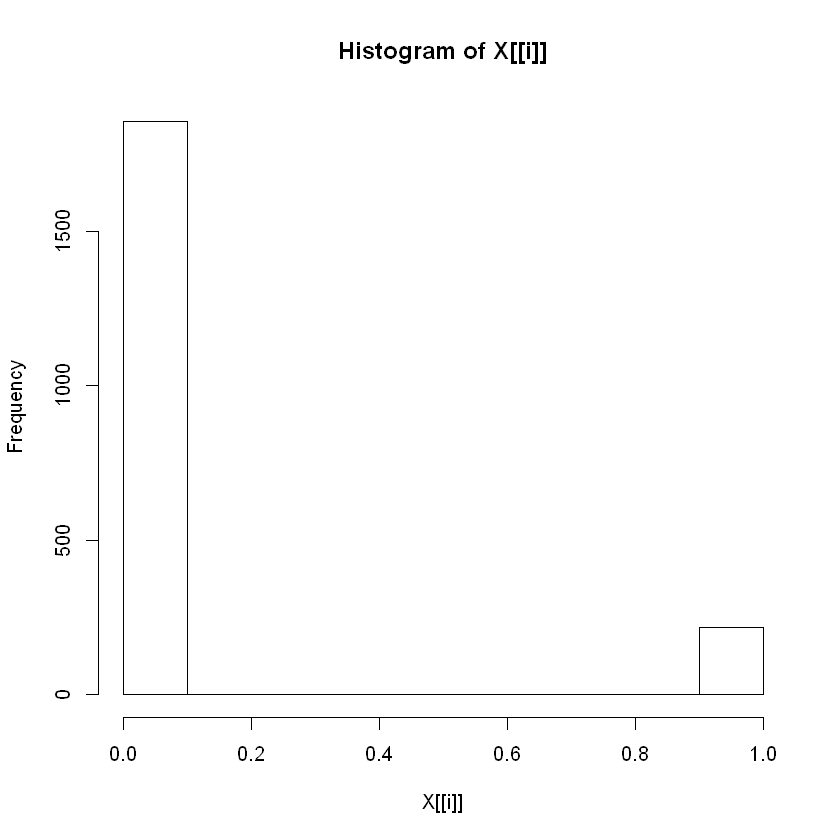

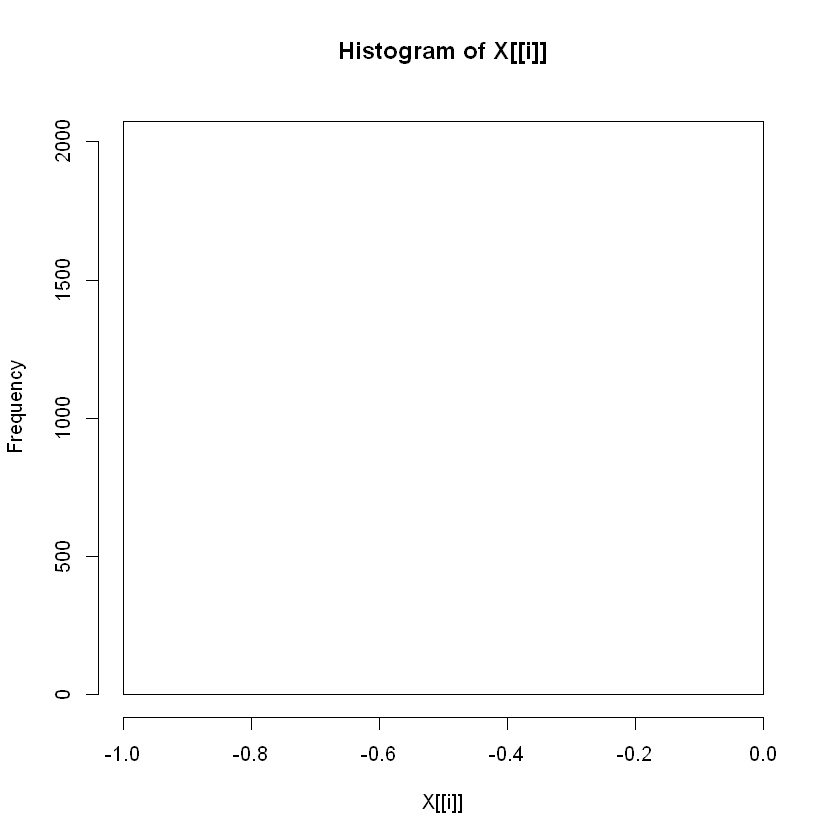

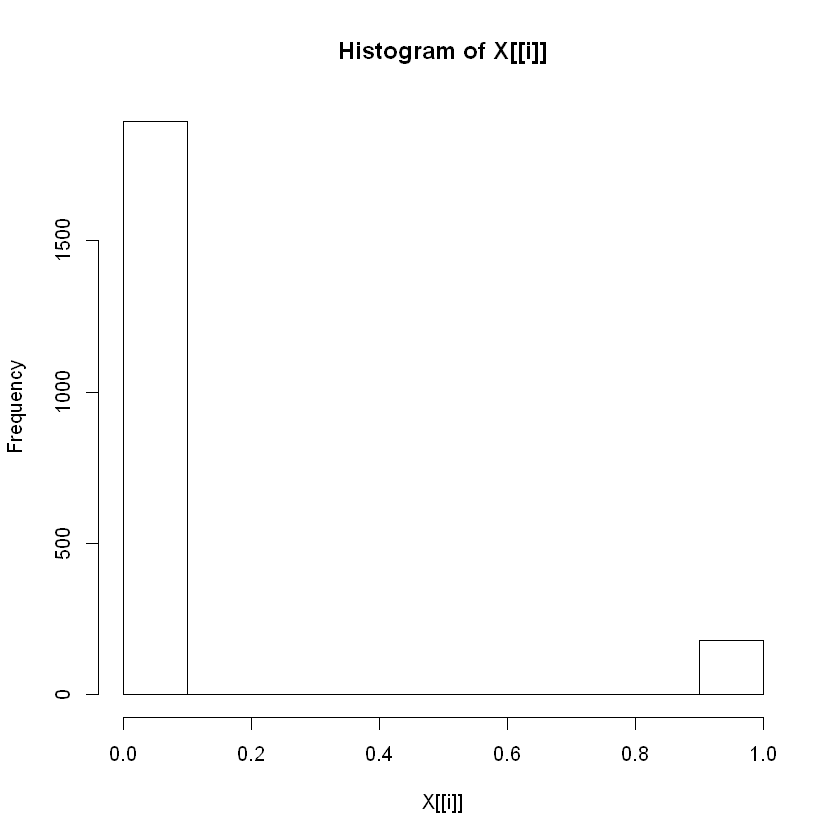

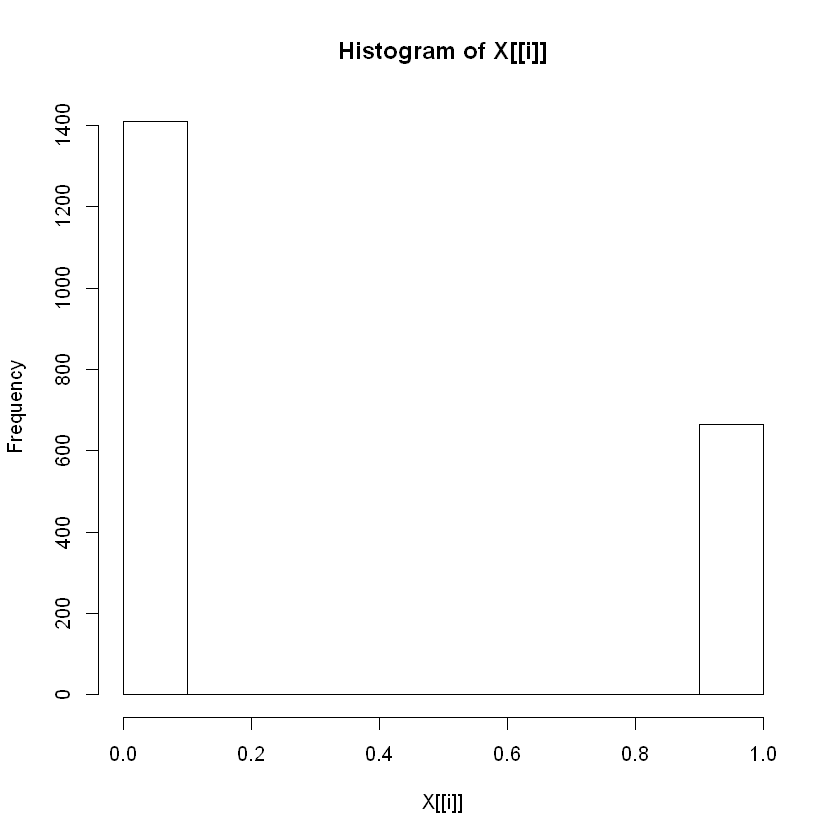

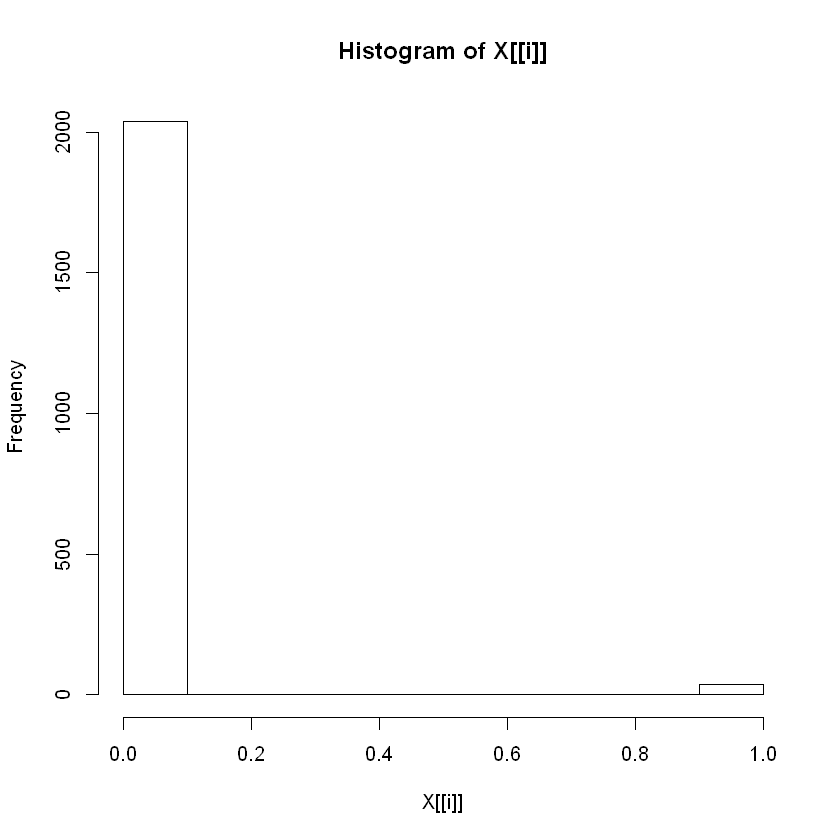

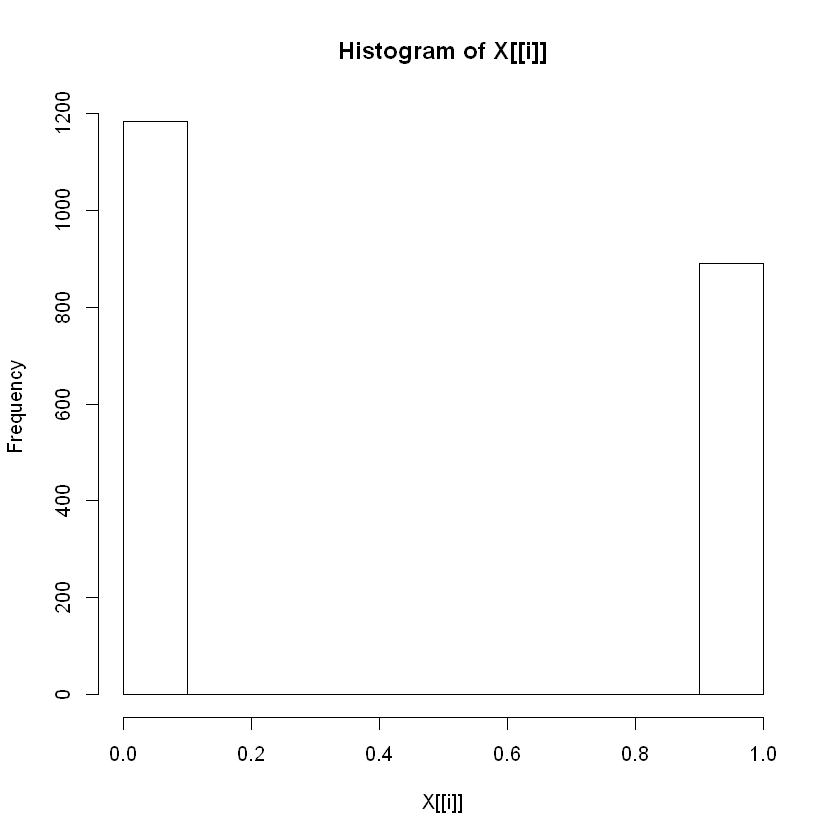

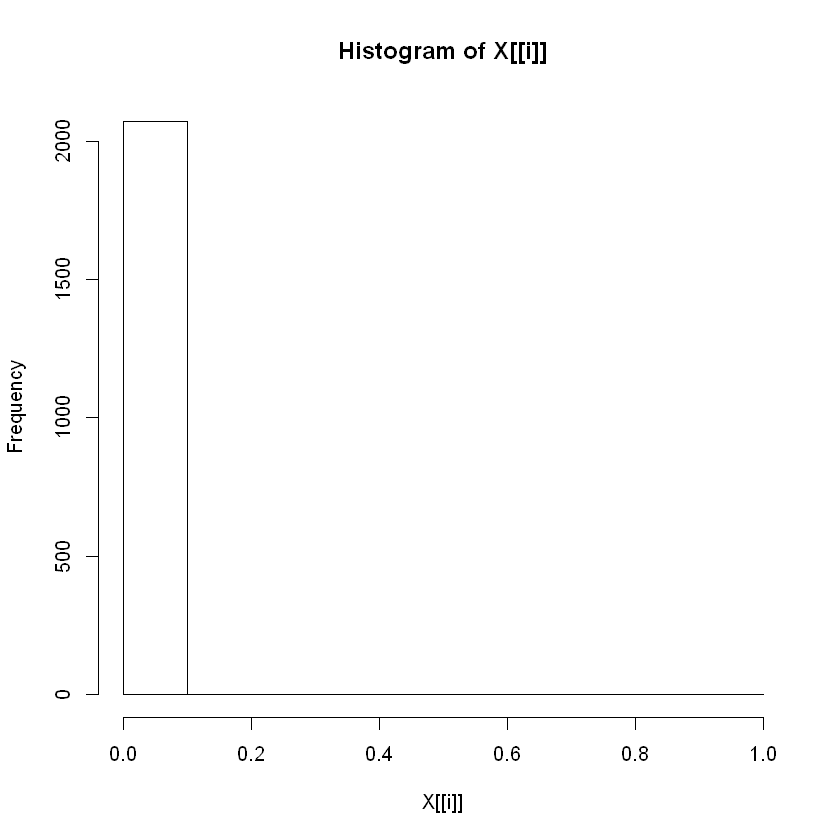

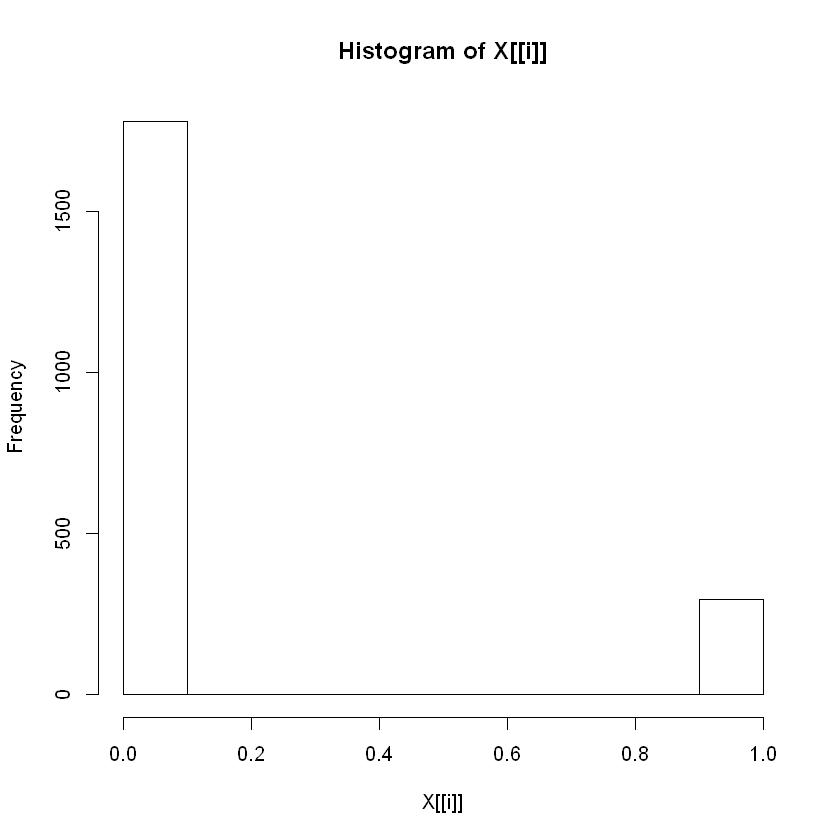

ERROR: Error in hist.default(X[[i]], ...): 'x' must be numeric


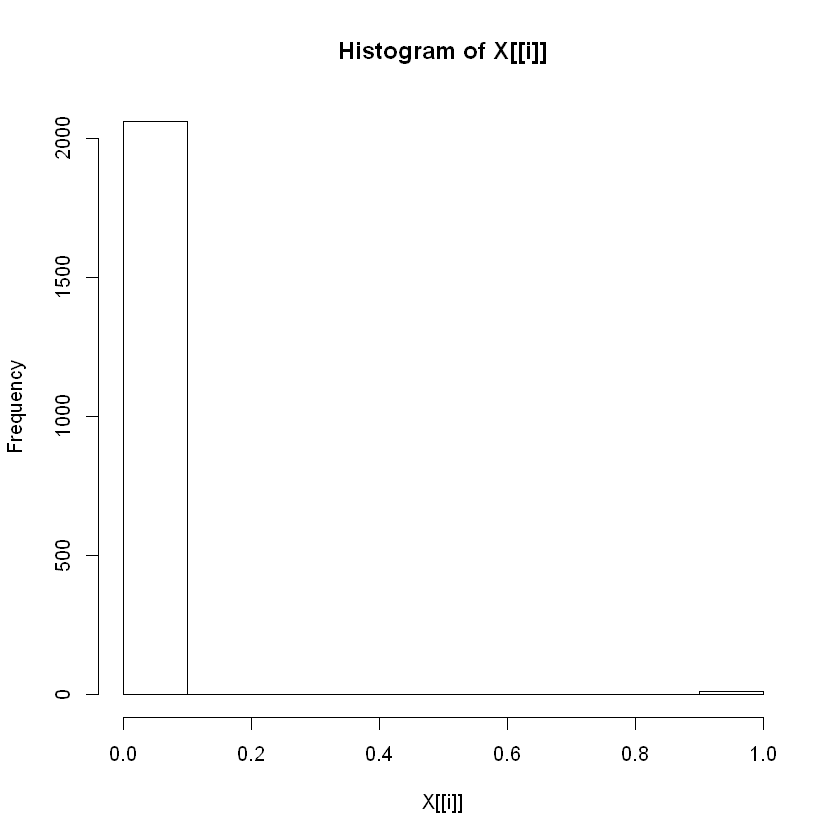

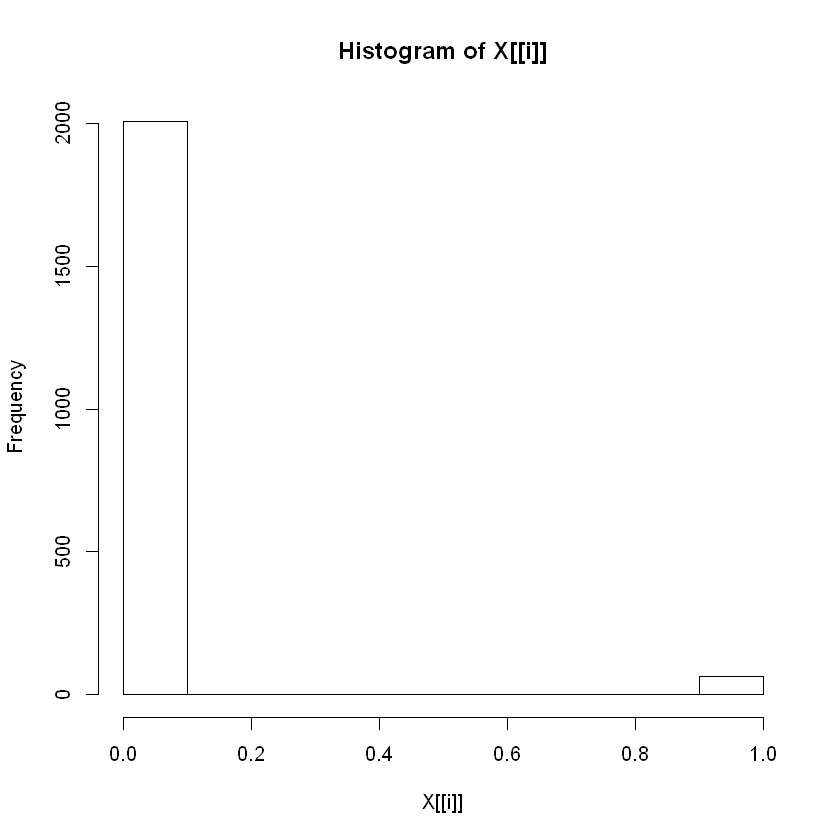

In [14]:
sapply(traindata, hist)

In [15]:
sapply(traindata, str)

 int [1:2074] 27 30 37 29 33 33 29 27 28 27 ...
 int [1:2074] 1 0 0 0 1 0 1 1 1 0 ...
 int [1:2074] 1 1 1 1 1 0 0 1 1 1 ...
 int [1:2074] 1 1 1 1 0 1 1 1 1 0 ...
 int [1:2074] 18 18 1 14 2 5 16 13 0 8 ...
 int [1:2074] 3 13 3 9 15 5 1 4 0 18 ...
 int [1:2074] 1 3 14 3 12 12 2 17 2 18 ...
 int [1:2074] 28 19 33 29 39 26 24 34 40 26 ...
 num [1:2074] 119.9 86.7 174 8.8 55 ...
 num [1:2074] 154 133 128 127 188 ...
 num [1:2074] 121.4 129 100.2 55.5 156.6 ...
 int [1:2074] 1 0 0 1 1 0 0 0 0 1 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 404 303 454 383 404 404 404 30 202 404 ...
 int [1:2074] 1 1 1 1 0 1 0 1 1 1 ...
 int [1:2074] 0 0 0 1 0 0 0 0 1 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:2074] 0 1 0 0 0 0 0 0 0 0 ...
 int [1:2074] 1 1 1 0 1 0 1 0 0 0 ...
 int [1:2074] 0 0 0 1 0 0 0 1 1 0 ...
 int [1:2074] 0 0 0 0 0 1 0

$x1
NULL

$x2
NULL

$x3
NULL

$x4
NULL

$x5
NULL

$x6
NULL

$x7
NULL

$x8
NULL

$x9
NULL

$x10
NULL

$x11
NULL

$x12
NULL

$x13
NULL

$x14
NULL

$x15
NULL

$x16
NULL

$x17
NULL

$x18
NULL

$x19
NULL

$x20
NULL

$x21
NULL

$x22
NULL

$x23
NULL

$x24
NULL

$x25
NULL

$x26
NULL

$x27
NULL

$x28
NULL

$x29
NULL

$x30
NULL

$x31
NULL

$x32
NULL

$x33
NULL

$x34
NULL

$x35
NULL

$x36
NULL

$x37
NULL

$x38
NULL

$x39
NULL

$x40
NULL

$x41
NULL

$x42
NULL

$x43
NULL

$x44
NULL

$x45
NULL

$x46
NULL

$x47
NULL

$x48
NULL

$x49
NULL

$x50
NULL

$x51
NULL

$x52
NULL

$x53
NULL

$x54
NULL

$x55
NULL

$x56
NULL

$x57
NULL

$x58
NULL

$x59
NULL

$x60
NULL

$y
NULL

In [16]:
#columns 50 and 52 are empty columns. also output is omitted. 49 and 59 da çıkarılabilir.
traindata <- traindata[,-c(50,52)]

In [43]:
testdata <- testdata[,-c(50,52)]

In [44]:
dim(testdata)

[1] 2073   58

In [17]:
#control
fitControl <- trainControl(method = "repeatedcv", number = 10, verboseIter = TRUE, classProbs = TRUE)

In [36]:
install.packages("e1071")

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mudur\AppData\Local\Temp\RtmpOkqIFa\downloaded_packages


In [20]:
set.seed(1)
trainIndex = createDataPartition(traindata$y, p = 0.7, list = FALSE)
traindata7 = traindata[trainIndex, ]
traindata3 =traindata[-trainIndex, ]

In [21]:
dim(traindata7)
dim(traindata3)


[1] 1453   59

[1] 621  59

In [22]:
traindata3

x1  x2  x3  x4  x5  x6  x7  x8  x9    x10   ... x51 x53 x54 x55 x56 x57
2    30  0   1   1   18  13   3  19   86.7 132.9 ... 0   0   0   0   1   0  
5    33  1   1   0    2  15  12  39   55.0 187.6 ... 0   0   0   0   1   0  
6    33  0   0   1    5   5  12  26  144.7 150.9 ... 0   1   1   0   0   0  
9    28  1   1   1    0   0   2  40  121.3  90.0 ... 0   0   0   0   0   0  
13   25  0   1   1    4  18  18  33   72.2 178.9 ... 0   0   0   0   0   0  
14   29  1   1   0    7  12   0  25  184.9 102.5 ... 0   0   0   0   0   0  
15   36  1   0   0    3  16  15  26  159.4 154.9 ... 0   0   1   0   0   0  
20   30  1   1   1    6  17  16  30   92.4  36.8 ... 0   0   0   0   1   0  
22   28  0   1   1    4   4   1  27  142.7   0.8 ... 0   0   1   0   0   0  
28   27  1   0   0    1  17  18  30  164.2 150.5 ... 0   0   0   0   0   0  
35   36  0   0   1   14   7   0  33  189.6 157.6 ... 0   0   0   0   1   0  
44   38  1   1   1    1   4  10  23  118.6 186.7 ... 1   0   0   0   1   0  
45   28  0   1   1    6  17   6  32   64.7 102.6 ... 0   1   0   0   1   0  
46   23  1   0   1   13   3  12  29   21.5 165.0 ... 0   0   0   0   0   0  
48   24  1   1   1   15   4  13  32  173.5 156.6 ... 0   0   0   0   1   0  
58   34  1   0   0   16   7   2  27  148.0 125.1 ... 1   0   0   0   1   0  
62   28  1   1   1    0  10   3  26   49.3 141.1 ... 0   0   0   0   0   0  
65   29  1   1   1   12  17  10  25   32.9 163.5 ... 0   0   1   0   0   0  
66   31  1   1   1   13   9   8  33  142.6 128.0 ... 0   1   0   0   1   0  
74   27  1   0   0    0   8   7  24  171.4  74.6 ... 0   0   0   0   1   0  
85   34  0   1   1   10   5   9  28   78.1  37.7 ... 0   0   1   0   0   0  
87   26  1   1   0   18  15  14  32    0.2  10.0 ... 0   0   1   0   0   0  
92   26  0   1   1    4   8   1  33   52.5 163.9 ... 0   0   0   0   1   0  
94   31  1   1   0    8   1  13  28  184.4 151.5 ... 0   0   1   0   0   0  
96   32  1   1   1    8   2  11  24  183.8  10.1 ... 0   0   1   0   0   0  
100  32  0   1   1   15  16   7  39   85.0 188.4 ... 0   0   1   0   0   0  
105  29  0   0   0   16  12   3  47   20.8  56.9 ... 1   0   0   0   1   0  
111  21  1   1   0    6   2  16  34   92.8 109.5 ... 0   1   0   0   1   0  
112  28  0   1   0    6  12   3  38  162.6  37.1 ... 0   1   0   0   1   0  
114  31  1   1   1    3  10   1  35  137.4 147.1 ... 0   0   0   0   0   0  
...  ... ... ... ... ... ... ... ... ...   ...       ... ... ... ... ... ...
1981 24  1   1   1   17   8   2  26   87.7 139.2 ... 0   0   1   0   0   0  
1985 30  1   0   1    2   0   0  33  197.0  56.7 ... 0   0   0   0   1   0  
1993 38  1   1   1    2   2  15  33   62.4 121.8 ... 0   0   0   0   1   0  
1994 33  1   1   1   18   6   0  41  107.8  55.4 ... 0   0   1   0   0   0  
1995 30  0   1   1   17   4   3  26  199.9 172.1 ... 0   0   0   0   0   0  
1997 33  0   0   1   18   2   9  36  189.7 185.5 ... 0   0   0   0   0   0  
1998 30  0   1   1    8   9  12  27    9.1  62.6 ... 0   0   0   0   0   0  
2000 29  1   0   1   12   6  10  18  148.3 111.3 ... 0   0   1   0   0   0  
2002 30  1   1   1    4   1  17  27  134.9 152.1 ... 0   0   0   0   1   0  
2005 30  1   1   1    8   4   8  33   92.0 111.9 ... 0   0   0   0   0   0  
2017 30  1   0   1   15  10  16  36  138.9 160.5 ... 0   0   1   0   0   0  
2018 30  1   1   0   18   8  13  36   85.6  77.4 ... 0   0   0   1   1   0  
2019 23  1   0   1    4  17   3  34  181.3  95.2 ... 0   0   0   0   1   0  
2020 26  0   1   1    0   5  13  35   44.4  99.7 ... 0   0   0   0   0   0  
2021 24  0   0   1   14   0  13  24   82.0 116.1 ... 1   0   0   0   0   0  
2025 27  1   1   0    8   9  16  30   26.8  10.3 ... 0   0   1   0   0   0  
2026 36  0   0   1   13  18  16  29  155.3   4.9 ... 0   0   0   0   1   0  
2030 32  1   0   1   12  12   4  32   42.4  44.5 ... 0   0   0   0   0   0  
2032 32  1   1   1    8   3   4  30  139.7 114.8 ... 0   0   0   0   0   0  
2038 31  0   1   1   17   7  10  18  160.7 199.9 ... 0   0   0   0   1   0  
2

In [31]:
#Lasso
tunegrid <- expand.grid(alpha = 1,lambda = seq(0.001,0.01,by = 0.001))
Lasso <- train(y~., data=traindata7, method="glmnet", trControl = fitControl, tuneGrid = tunegrid)
predLasso <- predict(Lasso,traindata3[,-59],type = 'prob')  #testdata 

+ Fold01.Rep1: alpha=1, lambda=0.01 
- Fold01.Rep1: alpha=1, lambda=0.01 
+ Fold02.Rep1: alpha=1, lambda=0.01 
- Fold02.Rep1: alpha=1, lambda=0.01 
+ Fold03.Rep1: alpha=1, lambda=0.01 
- Fold03.Rep1: alpha=1, lambda=0.01 
+ Fold04.Rep1: alpha=1, lambda=0.01 
- Fold04.Rep1: alpha=1, lambda=0.01 
+ Fold05.Rep1: alpha=1, lambda=0.01 
- Fold05.Rep1: alpha=1, lambda=0.01 
+ Fold06.Rep1: alpha=1, lambda=0.01 
- Fold06.Rep1: alpha=1, lambda=0.01 
+ Fold07.Rep1: alpha=1, lambda=0.01 
- Fold07.Rep1: alpha=1, lambda=0.01 
+ Fold08.Rep1: alpha=1, lambda=0.01 
- Fold08.Rep1: alpha=1, lambda=0.01 
+ Fold09.Rep1: alpha=1, lambda=0.01 
- Fold09.Rep1: alpha=1, lambda=0.01 
+ Fold10.Rep1: alpha=1, lambda=0.01 
- Fold10.Rep1: alpha=1, lambda=0.01 
Aggregating results
Selecting tuning parameters
Fitting alpha = 1, lambda = 0.009 on full training set


In [34]:
predLasso$b

[1] 0.175791389 0.199521843 0.079043928 0.009863651 0.018321009 0.337274285
  [7] 0.018228757 0.159804940 0.038008996 0.699090155 0.281855042 0.174013864
 [13] 0.349416154 0.131353928 0.605469367 0.671641260 0.449566803 0.013475348
 [19] 0.113838557 0.841353594 0.001843793 0.053698273 0.542045409 0.011161586
 [25] 0.041040421 0.025690117 0.298308101 0.658337119 0.305993050 0.079395757
 [31] 0.943677732 0.596216692 0.003959950 0.084450302 0.168457779 0.006090721
 [37] 0.151130319 0.018357742 0.053632931 0.679361381 0.795709843 0.068238014
 [43] 0.017086988 0.576175678 0.037525372 0.020931720 0.042044782 0.218953127
 [49] 0.209870104 0.071109747 0.691470811 0.004536390 0.582824340 0.026427585
 [55] 0.867623117 0.222241697 0.224892440 0.004305373 0.031839589 0.542298350
 [61] 0.186661822 0.248728742 0.121680084 0.523992180 0.163907047 0.356585210
 [67] 0.334417301 0.891764069 0.006310391 0.052095554 0.047997716 0.181225990
 [73] 0.240089550 0.035591701 0.520036046 0.043028860 0.153067594 0.264444991
 [79] 0.365856330 0.871201595 0.400277288 0.230417564 0.021808800 0.009427131
 [85] 0.198115524 0.084805010 0.012565952 0.365424394 0.014306145 0.178047019
 [91] 0.078924821 0.388055989 0.311059117 0.020256981 0.298373527 0.255545396
 [97] 0.018715135 0.087966065 0.063146136 0.138467612 0.332132263 0.580437004
[103] 0.071731035 0.234172843 0.150938230 0.332866763 0.167693839 0.365027676
[109] 0.483387089 0.772438047 0.268958114 0.023510533 0.335360307 0.603910820
[115] 0.192217382 0.117041306 0.180511876 0.030157878 0.176989536 0.016469221
[121] 0.056479527 0.007135402 0.367004666 0.018248016 0.053711258 0.179088373
[127] 0.911596592 0.459118673 0.024373038 0.527098886 0.224445098 0.492700922
[133] 0.025141204 0.002582256 0.084247228 0.136116300 0.005561179 0.024730664
[139] 0.576093260 0.075999594 0.418921431 0.039993202 0.006125823 0.040759461
[145] 0.018975227 0.483260485 0.037365460 0.051512333 0.144878287 0.101547787
[151] 0.547863360 0.028333505 0.250455340 0.714297147 0.188290688 0.824573748
[157] 0.144749048 0.177441362 0.150537699 0.587056893 0.331297540 0.300677422
[163] 0.854803869 0.033029602 0.011558355 0.529511316 0.025762327 0.135529977
[169] 0.038939541 0.034678754 0.974729350 0.451942050 0.237986938 0.642751130
[175] 0.165636831 0.009457112 0.038406194 0.941332580 0.226458831 0.125188736
[181] 0.169775101 0.512890059 0.482831815 0.144580989 0.385706760 0.535253875
[187] 0.129441297 0.521237489 0.476765722 0.556092200 0.894832081 0.029072809
[193] 0.771118054 0.007126694 0.223986330 0.018213401 0.029218067 0.041450141
[199] 0.054218196 0.094736966 0.144245075 0.018927865 0.165751753 0.108681446
[205] 0.270379807 0.514289869 0.729900235 0.108823787 0.129344297 0.433337603
[211] 0.561383436 0.246338577 0.011396529 0.743855612 0.397393456 0.366088910
[217] 0.297036636 0.834731104 0.647207842 0.661395875 0.186322374 0.535487527
[223] 0.134773203 0.312818061 0.092206408 0.026179291 0.014711751 0.156837323
[229] 0.026219840 0.012053167 0.674806407 0.017831069 0.693707921 0.026296502
[235] 0.055540134 0.281043372 0.732674471 0.054108694 0.026199293 0.999996863
[241] 0.095476941 0.648708680 0.379827311 0.128394650 0.032520638 0.477607090
[247] 0.076285697 0.118053746 0.179150200 0.009513820 0.466121242 0.370894408
[253] 0.020530099 0.044318916 0.004385360 0.005437820 0.295267161 0.013226912
[259] 0.744042694 0.006614787 0.672543428 0.104077489 0.019616562 0.113613782
[265] 0.215469244 0.011278631 0.220453099 0.706935664 0.803524090 0.043939504
[271] 0.825511815 0.303191251 0.478816915 0.168968913 0.042062233 0.260707447
[277] 0.173799152 0.013122980 0.062122589 0.075173599 0.267658465 0.858288684
[283] 0.708982941 0.379545672 0.502801245 0.274193318 0.201185934 0.005334461
[289] 0.030095969 0.024578371 0.602079528 0.756370685 0.432445527 0.612872535
[295] 0.111517185 0.060278484 0.016365473 0.486605670 0.019679924 0.062884015
[301] 0.399506765 0.004680093 0.042799082 0.013671618 0.119264253 0.172294176
[307] 0.384733753 0.2826

In [41]:
rf.roc<-roc(traindata3$y,predLasso$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8877

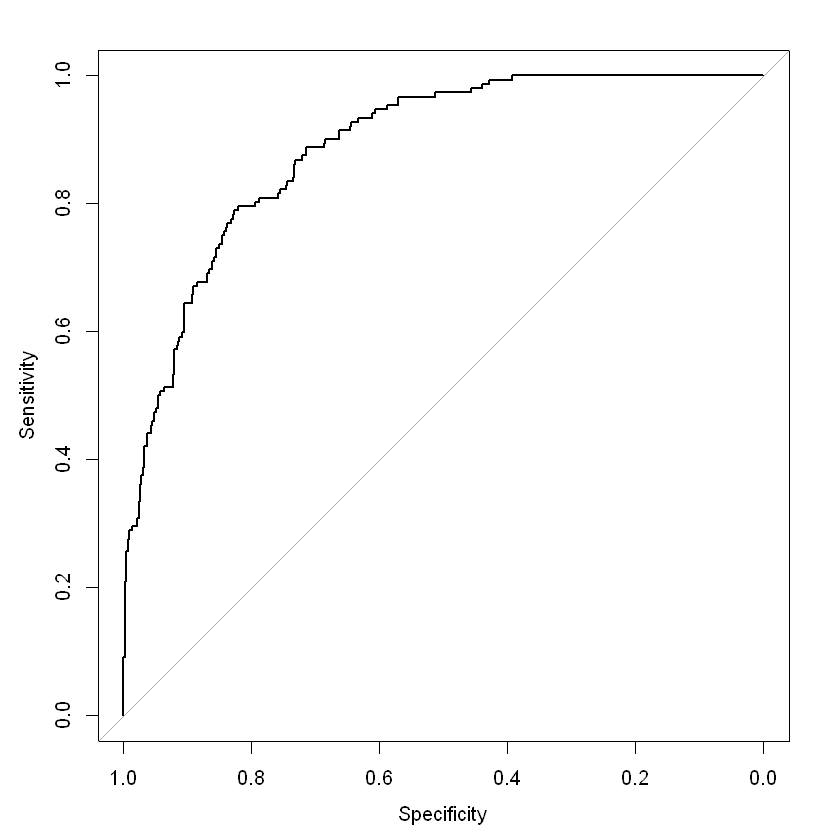

In [42]:
plot(rf.roc)

In [48]:
predtest <- predict(Lasso,testdata,type = 'prob')  #testdata 
predtest$b

a            b          
1    9.746425e-01 0.02535754 
2    9.384452e-01 0.06155482 
3    5.209597e-01 0.47904029 
4    9.408176e-01 0.05918237 
5    4.051267e-01 0.59487331 
6    8.542228e-01 0.14577724 
7    6.821569e-01 0.31784310 
8    6.845227e-01 0.31547731 
9    9.363397e-01 0.06366028 
10   9.867706e-01 0.01322942 
11   7.852515e-01 0.21474852 
12   8.127436e-01 0.18725635 
13   9.851925e-01 0.01480750 
14   1.384830e-06 0.99999862 
15   9.179305e-01 0.08206946 
16   9.561237e-01 0.04387626 
17   9.851144e-01 0.01488563 
18   8.076539e-01 0.19234608 
19   8.314081e-01 0.16859191 
20   9.830451e-01 0.01695487 
21   9.531189e-01 0.04688112 
22   7.088755e-01 0.29112455 
23   1.034937e-01 0.89650635 
24   9.838886e-01 0.01611142 
25   4.184041e-01 0.58159590 
26   9.348432e-01 0.06515679 
27   7.935976e-01 0.20640244 
28   2.697360e-01 0.73026396 
29   4.903894e-01 0.50961059 
30   9.061123e-01 0.09388767 
...  ...          ...        
2044 0.86584615   0.134153846
2045 0.98926459   0.010735411
2046 0.97611787   0.023882129
2047 0.88484814   0.115151860
2048 0.87494692   0.125053075
2049 0.74701675   0.252983254
2050 0.98445663   0.015543372
2051 0.96200009   0.037999911
2052 0.53021578   0.469784220
2053 0.95741001   0.042589988
2054 0.91122180   0.088778195
2055 0.33970888   0.660291120
2056 0.72016480   0.279835199
2057 0.19106722   0.808932778
2058 0.93223751   0.067762486
2059 0.96010024   0.039899755
2060 0.93823660   0.061763398
2061 0.85598329   0.144016711
2062 0.82679879   0.173201209
2063 0.96308546   0.036914538
2064 0.83127156   0.168728439
2065 0.98519968   0.014800319
2066 0.06721396   0.932786043
2067 0.97660003   0.023399971
2068 0.78112222   0.218877783
2069 0.82793828   0.172061718
2070 0.99594273   0.004057265
2071 0.77984936   0.220150644
2072 0.86458851   0.135411490
2073 0.76053038   0.239469617

In [50]:
# install the required packages first
require(jsonlite)
require(httr)
require(data.table)

In [51]:
get_token <- function(username, password, url_site){
    
    post_body = list(username=username,password=password)
    post_url_string = paste0(url_site,'/token/')
    result = POST(post_url_string, body = post_body)

    # error handling (wrong credentials)
    if(result$status_code==400){
        print('Check your credentials')
        return(0)
    }
    else if (result$status_code==201){
        output = content(result)
        token = output$key
    }

    return(token)
}

In [52]:
send_submission <- function(predictions, token, url_site, submit_now=F){
    
    format_check=check_format(predictions)
    if(!format_check){
        return(FALSE)
    }
    
    post_string="list("
    for(i in 1:length(predictions)){
        if(i<length(predictions)){
            post_string=sprintf("%s%s,",post_string,predictions[i])
        } else {
            post_string=sprintf("%s%s)",post_string,predictions[i])
        }
    }
    
    submission = eval(parse(text=post_string))
    json_body = jsonlite::toJSON(submission, auto_unbox = TRUE)
    submission=list(submission=json_body)
    print(submission)

    if(!submit_now){
        print("You did not submit.")
        return(FALSE)      
    }
    

    header = add_headers(c(Authorization=paste('Token',token,sep=' ')))
    post_url_string = paste0(url_site,'/submission/')
    result = POST(post_url_string, header, body=submission)
    
    if (result$status_code==201){
        print("Successfully submitted. Below you can see the details of your submission")
    } else {
        print("Could not submit. Please check the error message below, contact the assistant if needed.")
    }
    
    print(content(result))
    
}

In [53]:
check_format <- function(predictions){
    
    if(all(is.numeric(predictions)) & all(predictions<=1)){
        print("Format OK")
        return(TRUE)
    } else {
        print("Wrong format")
        return(FALSE)
    }
    
}

In [61]:
# this part is main code
subm_url ='http://46.101.121.83'

u_name = "Los Galacticos"
p_word = "E6lOux9kirvumsWW"
submit_now = TRUE

username = u_name
password = p_word

In [55]:
token = get_token(username=u_name, password=p_word, url=subm_url)

In [56]:
token

[1] "59900fa65e181d65c4c676e8904fbdf065448577"

In [63]:
predictions <- predtest$b

In [64]:
send_submission(predictions, token, url=subm_url, submit_now= submit_now)

[1] "Format OK"
$submission
[0.0254,0.0616,0.479,0.0592,0.5949,0.1458,0.3178,0.3155,0.0637,0.0132,0.2147,0.1873,0.0148,1,0.0821,0.0439,0.0149,0.1923,0.1686,0.017,0.0469,0.2911,0.8965,0.0161,0.5816,0.0652,0.2064,0.7303,0.5096,0.0939,0.2214,0.6963,0.0276,0.4405,0.6905,0.0899,0.6095,0.8207,0.7961,0.02,0.1873,0.1907,0.0716,0.8303,0.2583,0.6399,0.2037,0.0284,0.1729,0.0746,0.0572,0.0296,0.125,0.2225,0.9216,0.6843,0.581,0.509,0.0936,0.2802,0.8803,0.0184,0.0209,0.1183,0.0643,0.0221,0.0034,0.0148,0.4833,0.0916,0.4046,0.0075,0.0154,0.5038,0.0105,0.0974,0.5605,0.0176,0.3122,0.0344,0.7539,0.0281,0.0127,0.5827,0.1864,0.1777,0.0149,0.0543,0.691,0.2673,0.0426,0.0316,0.0608,0.8655,0.1167,0.195,0.0203,0.0796,0.3674,0.5291,0.7917,0.0193,0.5773,0.461,0.1714,0.4487,0.0604,0.168,0.2514,0.0425,0.0197,0.7948,0.0075,0.5643,0.3064,0.0053,0.0046,0.504,0.041,0.0089,0.0532,0.0344,0.0127,0.0618,0.1391,0.0044,0.0315,0.2407,0.6108,0.0198,0.5248,0.2311,0.268,0.2627,0.3768,0.4568,0.0069,0.6983,0.0839,0.4712,0.2559,0.1

# SUBMISSION 2

In [65]:
tunegrid <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [66]:
set.seed(300)
RF <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

In [67]:
RF

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1308, 1308, 1309, 1307, 1308, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8313967  0.4598982
   5    0.8410142  0.5106976
  10    0.8334514  0.4953906
  15    0.8396300  0.5223665

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [71]:
predRF <- predict(RF, traindata3, type = 'prob')
predRF$b

[1] 1.603518e-01 2.369864e-01 9.568392e-02 1.252586e-01 7.137308e-02
  [6] 3.252524e-01 1.636219e-03 1.909023e-01 1.885064e-02 5.304398e-01
 [11] 3.765684e-01 3.017353e-01 3.655778e-01 1.034384e-01 5.087399e-01
 [16] 6.121122e-01 3.293861e-01 2.566667e-03 2.950761e-01 7.266746e-01
 [21] 1.085098e-02 6.913584e-02 6.349840e-01 8.309365e-03 7.325072e-02
 [26] 3.197148e-02 3.151602e-01 6.311128e-01 2.259289e-01 1.291075e-01
 [31] 8.489770e-01 7.220786e-01 1.013333e-02 8.135851e-02 2.453241e-01
 [36] 6.620721e-03 1.969358e-01 9.266667e-03 6.326483e-02 7.206749e-01
 [41] 5.701346e-01 1.101887e-01 1.528736e-03 5.822715e-01 3.068182e-02
 [46] 1.634545e-02 9.857608e-02 2.926368e-01 2.942410e-01 7.542216e-02
 [51] 5.888150e-01 7.766667e-03 5.107832e-01 2.866190e-02 7.971663e-01
 [56] 2.559762e-01 2.534919e-01 2.592344e-02 1.090167e-01 4.507969e-01
 [61] 2.817963e-01 1.978728e-01 2.126708e-01 3.149109e-01 2.554849e-01
 [66] 4.173856e-01 3.484349e-01 8.652204e-01 1.730230e-02 3.685195e-02
 [71] 3.635948e-02 2.783070e-01 3.534539e-01 2.629320e-02 4.699262e-01
 [76] 6.523290e-02 1.700218e-01 2.497464e-01 3.598849e-01 8.302586e-01
 [81] 4.089035e-01 3.144630e-01 1.324624e-02 6.017007e-03 2.969247e-01
 [86] 9.405619e-02 2.809737e-02 3.397009e-01 1.339975e-01 2.225448e-01
 [91] 8.192953e-02 3.879081e-01 2.720347e-01 1.824148e-02 2.088920e-01
 [96] 1.160073e-01 2.779531e-02 1.580711e-01 1.262579e-01 1.617123e-01
[101] 4.096408e-01 4.503068e-01 2.673984e-01 2.095747e-01 1.071961e-01
[106] 3.242194e-01 2.396226e-01 3.186098e-01 4.770881e-01 8.082640e-01
[111] 3.064945e-01 3.281991e-02 3.407308e-01 6.056534e-01 2.905366e-01
[116] 1.176967e-01 2.361568e-01 2.944849e-02 2.031199e-01 7.280801e-02
[121] 4.058104e-02 1.273950e-02 4.331114e-01 4.415152e-03 6.089818e-02
[126] 1.672005e-01 7.448978e-01 4.445326e-01 2.587072e-02 4.225524e-01
[131] 2.106417e-01 4.150584e-01 4.746733e-02 7.652381e-03 3.430046e-02
[136] 1.424352e-01 5.810665e-02 2.680952e-02 5.271235e-01 1.303074e-01
[141] 4.719308e-01 1.034468e-01 8.528736e-03 6.111592e-02 2.953333e-02
[146] 6.436361e-01 7.284336e-02 1.292780e-01 1.620080e-01 1.221615e-01
[151] 3.883871e-01 2.754082e-02 2.002167e-01 3.500208e-01 2.401539e-01
[156] 4.984577e-01 1.515344e-01 1.353673e-01 2.754835e-01 5.351921e-01
[161] 3.184800e-01 3.021405e-01 8.249570e-01 3.564849e-02 1.510230e-02
[166] 5.302005e-01 9.546592e-02 2.276845e-01 7.490203e-02 3.578738e-02
[171] 8.819936e-01 3.381051e-01 4.779786e-01 6.855799e-01 3.035993e-01
[176] 1.042381e-02 1.737546e-01 8.621132e-01 2.536848e-01 1.034219e-01
[181] 1.722367e-01 4.462104e-01 5.954687e-01 1.432351e-01 5.030862e-01
[186] 6.015831e-01 9.418851e-02 3.898038e-01 4.725912e-01 4.825690e-01
[191] 8.499132e-01 6.011118e-02 7.213285e-01 7.533333e-03 3.574121e-01
[196] 1.392234e-01 7.501519e-02 1.034822e-01 1.595201e-01 1.350521e-01
[201] 7.644381e-02 2.335455e-02 7.601619e-02 2.827987e-01 2.728341e-01
[206] 7.014350e-01 7.104996e-01 3.081747e-01 7.631071e-02 5.615481e-01
[211] 4.731608e-01 2.788125e-01 2.316667e-03 5.684146e-01 3.578133e-01
[216] 4.407164e-01 3.640901e-01 8.165585e-01 6.071746e-01 4.990337e-01
[221] 1.966899e-01 4.153767e-01 9.731412e-02 4.473114e-01 1.648820e-01
[226] 1.729298e-02 5.694210e-02 1.478935e-01 7.923205e-02 1.102537e-01
[231] 6.577874e-01 1.848463e-02 5.696998e-01 2.525556e-02 1.425813e-01
[236] 3.405801e-01 6.286429e-01 1.218357e-01 8.923418e-02 7.828469e-01
[241] 1.402464e-01 6.306283e-01 3.053660e-01 8.528301e-02 1.023182e-02
[246] 4.325739e-01 1.608179e-01 3.471198e-01 1.956406e-01 1.800000e-03
[251] 4.074117e-01 4.332750e-01 5.636314e-02 5.753021e-02 3.200000e-03
[256] 4.193939e-03 4.010617e-01 1.936667e-02 6.292609e-01 3.666667e-03
[261] 7.144590e-01 2.469353e-01 6.230706e-02 2.647961e-01 9.127629e-02
[266] 4.757302e-02 2.264116e-01 6.069267e-01 7.278702e-01 2.155000e-02
[271] 7.647652e-01 3.840046e-01 5.225702e-01 2.811339e-01 5.342058e-02
[276] 4.190538e-01 2.637105e-01 2.717424e-02 3.050556e-02 1.113576e-01
[281] 1.849056e-01 6.57197

In [73]:
rf.roc<-roc(traindata3$y,predRF$b)
auc(rf.roc)

Setting levels: control = a, case = b
Setting direction: controls < cases


Area under the curve: 0.8853

In [85]:
tunegrid2 <- expand.grid(.mtry=c(3,5,10,15), .splitrule = "gini", .min.node.size = 5)

In [92]:
set.seed(350)
RF <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid2,num.trees = 250)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

In [93]:
RF

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1307, 1309, 1308, 1307, 1307, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8383441  0.4859690
   5    0.8445654  0.5229376
  10    0.8362703  0.5031613
  15    0.8376260  0.5196484

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 5, splitrule = gini
 and min.node.size = 5.

In [ ]:
predRF1 = 

In [ ]:
rf.roc<-roc(traindata3$y,RF$b)
auc(rf.roc)

In [90]:
set.seed(450)
RF1 <- train(y~., data=traindata7, method="ranger", trControl = fitControl, tuneGrid = tunegrid2,num.trees = 350)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

In [91]:
RF

Random Forest 

1453 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1307, 1307, 1308, 1308, 1308, 1308, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8300503  0.4524702
   5    0.8327901  0.4839481
  10    0.8348545  0.4990005
  15    0.8376226  0.5149350

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 15, splitrule = gini
 and min.node.size = 5.

In [95]:
set.seed(500)
RF4 <- train(y~., data=traindata, method="ranger", trControl = fitControl, tuneGrid = tunegrid2,num.trees = 250)

+ Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold01.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry= 5, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=10, splitrule=gini, min.node.size=5 
+ Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
- Fold02.Rep1: mtry=15, splitrule=gini, min.node.size=5 
+ Fold03.Rep1: mtry= 3, splitrule=gini, min.node.size=5 
- Fold03.Rep1: mtry= 3, splitru

In [96]:
RF4

Random Forest 

2074 samples
  58 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1867, 1867, 1867, 1866, 1867, 1867, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.8379831  0.4856301
   5    0.8394300  0.5052825
  10    0.8394370  0.5211929
  15    0.8432994  0.5350366

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 15, splitrule = gini
 and min.node.size = 5.

In [97]:
set.seed(750)
predtest2rf <- predict(RF4,testdata,type = 'prob')  #testdata 
predtest2rf$b

[1] 0.021333333 0.285066667 0.334133333 0.026866667 0.693533333 0.116333333
   [7] 0.262666667 0.353200000 0.066866667 0.007000000 0.258400000 0.216133333
  [13] 0.022133333 0.938466667 0.104533333 0.011066667 0.004800000 0.140400000
  [19] 0.154333333 0.011666667 0.064133333 0.316600000 0.952533333 0.002400000
  [25] 0.471133333 0.046200000 0.484400000 0.453333333 0.379733333 0.357066667
  [31] 0.404266667 0.673866667 0.008333333 0.377733333 0.454400000 0.250666667
  [37] 0.736733333 0.803866667 0.942200000 0.034333333 0.121333333 0.114000000
  [43] 0.070666667 0.650111111 0.205866667 0.698400000 0.183733333 0.018866667
  [49] 0.188466667 0.131000000 0.004000000 0.005466667 0.135733333 0.332866667
  [55] 0.885000000 0.547400000 0.639333333 0.558400000 0.084200000 0.334800000
  [61] 0.900533333 0.005400000 0.036000000 0.174200000 0.062533333 0.046000000
  [67] 0.004000000 0.004000000 0.798866667 0.088333333 0.552266667 0.017133333
  [73] 0.019333333 0.675800000 0.054133333 0.201533333 0.585333333 0.020000000
  [79] 0.299333333 0.056733333 0.942200000 0.058066667 0.000000000 0.629600000
  [85] 0.242000000 0.153600000 0.002000000 0.045066667 0.866733333 0.310333333
  [91] 0.002666667 0.024933333 0.053400000 0.721600000 0.066666667 0.336600000
  [97] 0.122266667 0.036733333 0.236400000 0.449866667 0.585733333 0.018533333
 [103] 0.353666667 0.250466667 0.337866667 0.374800000 0.005533333 0.242866667
 [109] 0.127533333 0.002000000 0.007933333 0.742866667 0.110533333 0.593266667
 [115] 0.266733333 0.010000000 0.010333333 0.361266667 0.019333333 0.013933333
 [121] 0.024466667 0.081200000 0.009666667 0.165666667 0.109733333 0.004000000
 [127] 0.017333333 0.205600000 0.679400000 0.040933333 0.438200000 0.279600000
 [133] 0.345800000 0.132666667 0.327133333 0.419866667 0.047666667 0.553666667
 [139] 0.091133333 0.612333333 0.322133333 0.172333333 0.344333333 0.407933333
 [145] 0.215733333 0.255933333 0.527800000 0.103733333 0.238866667 0.064600000
 [151] 0.045133333 0.314733333 0.132466667 0.114533333 0.000000000 0.109733333
 [157] 0.019400000 0.464266667 0.264200000 0.858266667 0.107733333 0.142000000
 [163] 0.034066667 0.081466667 0.004200000 0.543666667 0.056400000 0.539800000
 [169] 0.008800000 0.098000000 0.624933333 0.236866667 0.337066667 0.037200000
 [175] 0.291666667 0.002666667 0.132866667 0.243266667 0.358600000 0.866666667
 [181] 0.734400000 0.661600000 0.397933333 0.005333333 0.818800000 0.007800000
 [187] 0.004000000 0.130866667 0.132600000 0.150933333 0.000000000 0.483200000
 [193] 0.590400000 0.109133333 0.022000000 0.000000000 0.043133333 0.004800000
 [199] 0.027466667 0.703666667 0.398466667 0.120133333 0.122600000 0.552866667
 [205] 0.239066667 0.511466667 0.016133333 0.874000000 0.032400000 0.654333333
 [211] 0.027866667 0.000000000 0.066466667 0.626000000 0.215266667 0.581200000
 [217] 0.081866667 0.008866667 0.002000000 0.015933333 0.035400000 0.014000000
 [223] 0.214133333 0.469600000 0.062933333 0.140066667 0.071533333 0.765266667
 [229] 0.194533333 0.006133333 0.818466667 0.015933333 0.363333333 0.032200000
 [235] 0.004000000 0.012000000 0.489800000 0.136733333 0.318333333 0.563666667
 [241] 0.029000000 0.001000000 0.004000000 0.038133333 0.039666667 0.024333333
 [247] 0.617533333 0.552000000 0.653466667 0.008000000 0.018533333 0.881666667
 [253] 0.603444444 0.313800000 0.026600000 0.434200000 0.824133333 0.126866667
 [259] 0.143200000 0.167800000 0.569200000 0.156666667 0.014133333 0.265800000
 [265] 0.479133333 0.323666667 0.011800000 0.086666667 0.042333333 0.097866667
 [271] 0.196400000 0.182600000 0.199466667 0.193066667 0.025400000 0.203866667
 [277] 0.384066667 0.033066667 0.267800000 0.083733333 0.204600000 0.029000000
 [283] 0.191333333 0.055666667 0.549666667 0.274066667 0.049866667 0.316666667
 [289] 0.471066667 0.314466667 0.336466667 0.075266667 0.321400000 0.318466667
 [295] 0.304933333 0.951200000 0.563800000 0.098266667 0.042200000 0.078200000
 [301] 0.680066667 0.010333333 0.020666667 0.00000000

In [98]:
predictions <- predtest2rf$b
send_submission(predictions, token, url=subm_url, submit_now= submit_now)

[1] "Format OK"
$submission
[0.0213,0.2851,0.3341,0.0269,0.6935,0.1163,0.2627,0.3532,0.0669,0.007,0.2584,0.2161,0.0221,0.9385,0.1045,0.0111,0.0048,0.1404,0.1543,0.0117,0.0641,0.3166,0.9525,0.0024,0.4711,0.0462,0.4844,0.4533,0.3797,0.3571,0.4043,0.6739,0.0083,0.3777,0.4544,0.2507,0.7367,0.8039,0.9422,0.0343,0.1213,0.114,0.0707,0.6501,0.2059,0.6984,0.1837,0.0189,0.1885,0.131,0.004,0.0055,0.1357,0.3329,0.885,0.5474,0.6393,0.5584,0.0842,0.3348,0.9005,0.0054,0.036,0.1742,0.0625,0.046,0.004,0.004,0.7989,0.0883,0.5523,0.0171,0.0193,0.6758,0.0541,0.2015,0.5853,0.02,0.2993,0.0567,0.9422,0.0581,0,0.6296,0.242,0.1536,0.002,0.0451,0.8667,0.3103,0.0027,0.0249,0.0534,0.7216,0.0667,0.3366,0.1223,0.0367,0.2364,0.4499,0.5857,0.0185,0.3537,0.2505,0.3379,0.3748,0.0055,0.2429,0.1275,0.002,0.0079,0.7429,0.1105,0.5933,0.2667,0.01,0.0103,0.3613,0.0193,0.0139,0.0245,0.0812,0.0097,0.1657,0.1097,0.004,0.0173,0.2056,0.6794,0.0409,0.4382,0.2796,0.3458,0.1327,0.3271,0.4199,0.0477,0.5537,0.0911,0.6123,0.3221,0.1723